# 1. Set Up

In [ ]:
# load libraries 
import pandas as pd
import json
import matplotlib.pyplot as plt
from math import pi

In [ ]:
# Define file paths for each scenario

# Global green accord scenario
ga_intermediate_path = "master_thesis_2025/fcm_incognitive/results/ga_intermediate_nodes_values.json"
ga_output_path = "master_thesis_2025/fcm_incognitive/results/ga_output_nodes_values.json"
ga_nodes_excel_path = "master_thesis_2025/fcm_incognitive/data/scenarios/final_carbon_global_green_accord_fcm.xlsx"

# Light touch markets scenario
dereg_intermediate_path = "master_thesis_2025/fcm_incognitive/results/dereg_intermediate_nodes_values.json"
dereg_output_path = "master_thesis_2025/fcm_incognitive/results/dereg_output_nodes_values.json"
dereg_nodes_excel_path = "master_thesis_2025/fcm_incognitive/data/scenarios/final_carbon_light_touch_markets_fcm.xlsx"

# Brussels powerhouse scenario
bp_intermediate_path = "master_thesis_2025/fcm_incognitive/results/bp_intermediate_nodes_values.json"
bp_output_path = "master_thesis_2025/fcm_incognitive/results/bp_output_nodes_values.json"
bp_nodes_excel_path = "master_thesis_2025/fcm_incognitive/data/scenarios/final_carbon_brussels_powerhouse_fcm.xlsx"

# Fragmented green race
frag_intermediate_path = "master_thesis_2025/fcm_incognitive/results/frag_intermediate_nodes_values.json"
frag_output_path = "master_thesis_2025/fcm_incognitive/results/frag_output_nodes_values.json"
frag_nodes_excel_path = "master_thesis_2025/fcm_incognitive/data/scenarios/final_carbon_fragmented_green_race_fcm.xlsx"

# Tech drive acceleration
tech_intermediate_path = "master_thesis_2025/fcm_incognitive/results/tech_intermediate_nodes_values.json"
tech_output_path = "master_thesis_2025/fcm_incognitive/results/tech_output_nodes_values.json"
tech_nodes_excel_path = "master_thesis_2025/fcm_incognitive/data/scenarios/final_carbon_tech_driven_acceleration_fcm.xlsx"

# 2. Data Wrangling

## 2.1 One Scenario

In [5]:
# Convert both to DataFrames
df_intermediate = pd.DataFrame.from_dict(intermediate_data, orient="index", columns=["value"]).reset_index()
df_intermediate.rename(columns={"index": "node"}, inplace=True)

df_output = pd.DataFrame.from_dict(output_data, orient="index", columns=["value"]).reset_index()
df_output.rename(columns={"index": "node"}, inplace=True)

# Concatenate intermediate and output data
df = pd.concat([df_intermediate, df_output], ignore_index=True)

# Load node descriptions from Excel
nodes = pd.read_excel(ga_nodes_excel_path, sheet_name="nodes-order")

# Extract meaningful descriptions from node names
nodes["short_desc"] = nodes["node description"].str.replace(r"^S\d+\.\s*", "", regex=True)

# Merge with the main data to get descriptions
df = df.merge(nodes[["nodes order", "short_desc"]], left_on="node", right_on="nodes order", how="left")
df = df.drop(columns=["nodes order"])

In [ ]:
# Pivot to prepare for heatmap (rows: nodes, columns: scenarios)
heat = df.pivot(index="short_desc", columns="node", values="value")

## 2.2 All Scenarios

In [3]:
def read_scenario_data(paths, category_excel_path):
    scenario_data = {}
    for scenario, paths_dict in paths.items():
        intermediate_path = paths_dict['intermediate']
        output_path = paths_dict['output']
        nodes_excel_path = paths_dict['nodes']

        # Load intermediate node values
        with open(intermediate_path) as f:
            intermediate_data = json.load(f)

        # Load output node values
        with open(output_path) as f:
            output_data = json.load(f)

        # Convert both to DataFrames
        df_intermediate = pd.DataFrame.from_dict(intermediate_data, orient="index", columns=["value"]).reset_index()
        df_intermediate.rename(columns={"index": "node"}, inplace=True)
        df_intermediate['type'] = 'intermediate'

        df_output = pd.DataFrame.from_dict(output_data, orient="index", columns=["value"]).reset_index()
        df_output.rename(columns={"index": "node"}, inplace=True)
        df_output['type'] = 'output'

        # Concatenate intermediate and output data
        df = pd.concat([df_intermediate, df_output], ignore_index=True)

        # Load node descriptions from Excel
        nodes = pd.read_excel(nodes_excel_path, sheet_name="nodes-order")
        nodes["short_desc"] = nodes["node description"].str.replace(r"^S\d+\.\s*", "", regex=True)

        # Merge with the main data to get descriptions
        df = df.merge(nodes[["nodes order", "short_desc"]], left_on="node", right_on="nodes order", how="left")
        df = df.drop(columns=["nodes order"])

        # Load categories from the Excel file
        category_df = pd.read_csv(category_excel_path)
        
        # Merge the category information using short_desc
        df = df.merge(category_df[["concept", "category"]], left_on="short_desc", right_on="concept", how="left")
        df = df.drop(columns=["concept"])

        # Store the final DataFrame in the dictionary
        scenario_data[scenario] = df
    return scenario_data

In [ ]:
# Example paths dictionary
paths = {
    'Fragmented Green Race': {'intermediate': frag_intermediate_path, 'output': frag_output_path, 'nodes': frag_nodes_excel_path},
    'Tech-Driven Acceleration': {'intermediate': tech_intermediate_path, 'output': tech_output_path, 'nodes': tech_nodes_excel_path},
    'Global Green Accord': {'intermediate': ga_intermediate_path, 'output': ga_output_path, 'nodes': ga_nodes_excel_path},
    'Deregulation Paradise': {'intermediate': dereg_intermediate_path, 'output': dereg_output_path, 'nodes': dereg_nodes_excel_path},
    'Brussels Powerhouse': {'intermediate': bp_intermediate_path, 'output': bp_output_path, 'nodes': bp_nodes_excel_path}
}

category_path = "master_thesis_2025/fcm_incognitive/data/input_data/carbon_accounting_category_map.csv"

# Reading scenario data
scenario_data = read_scenario_data(paths, category_path)

# 3. All nodes visualization

## 3.1 First try

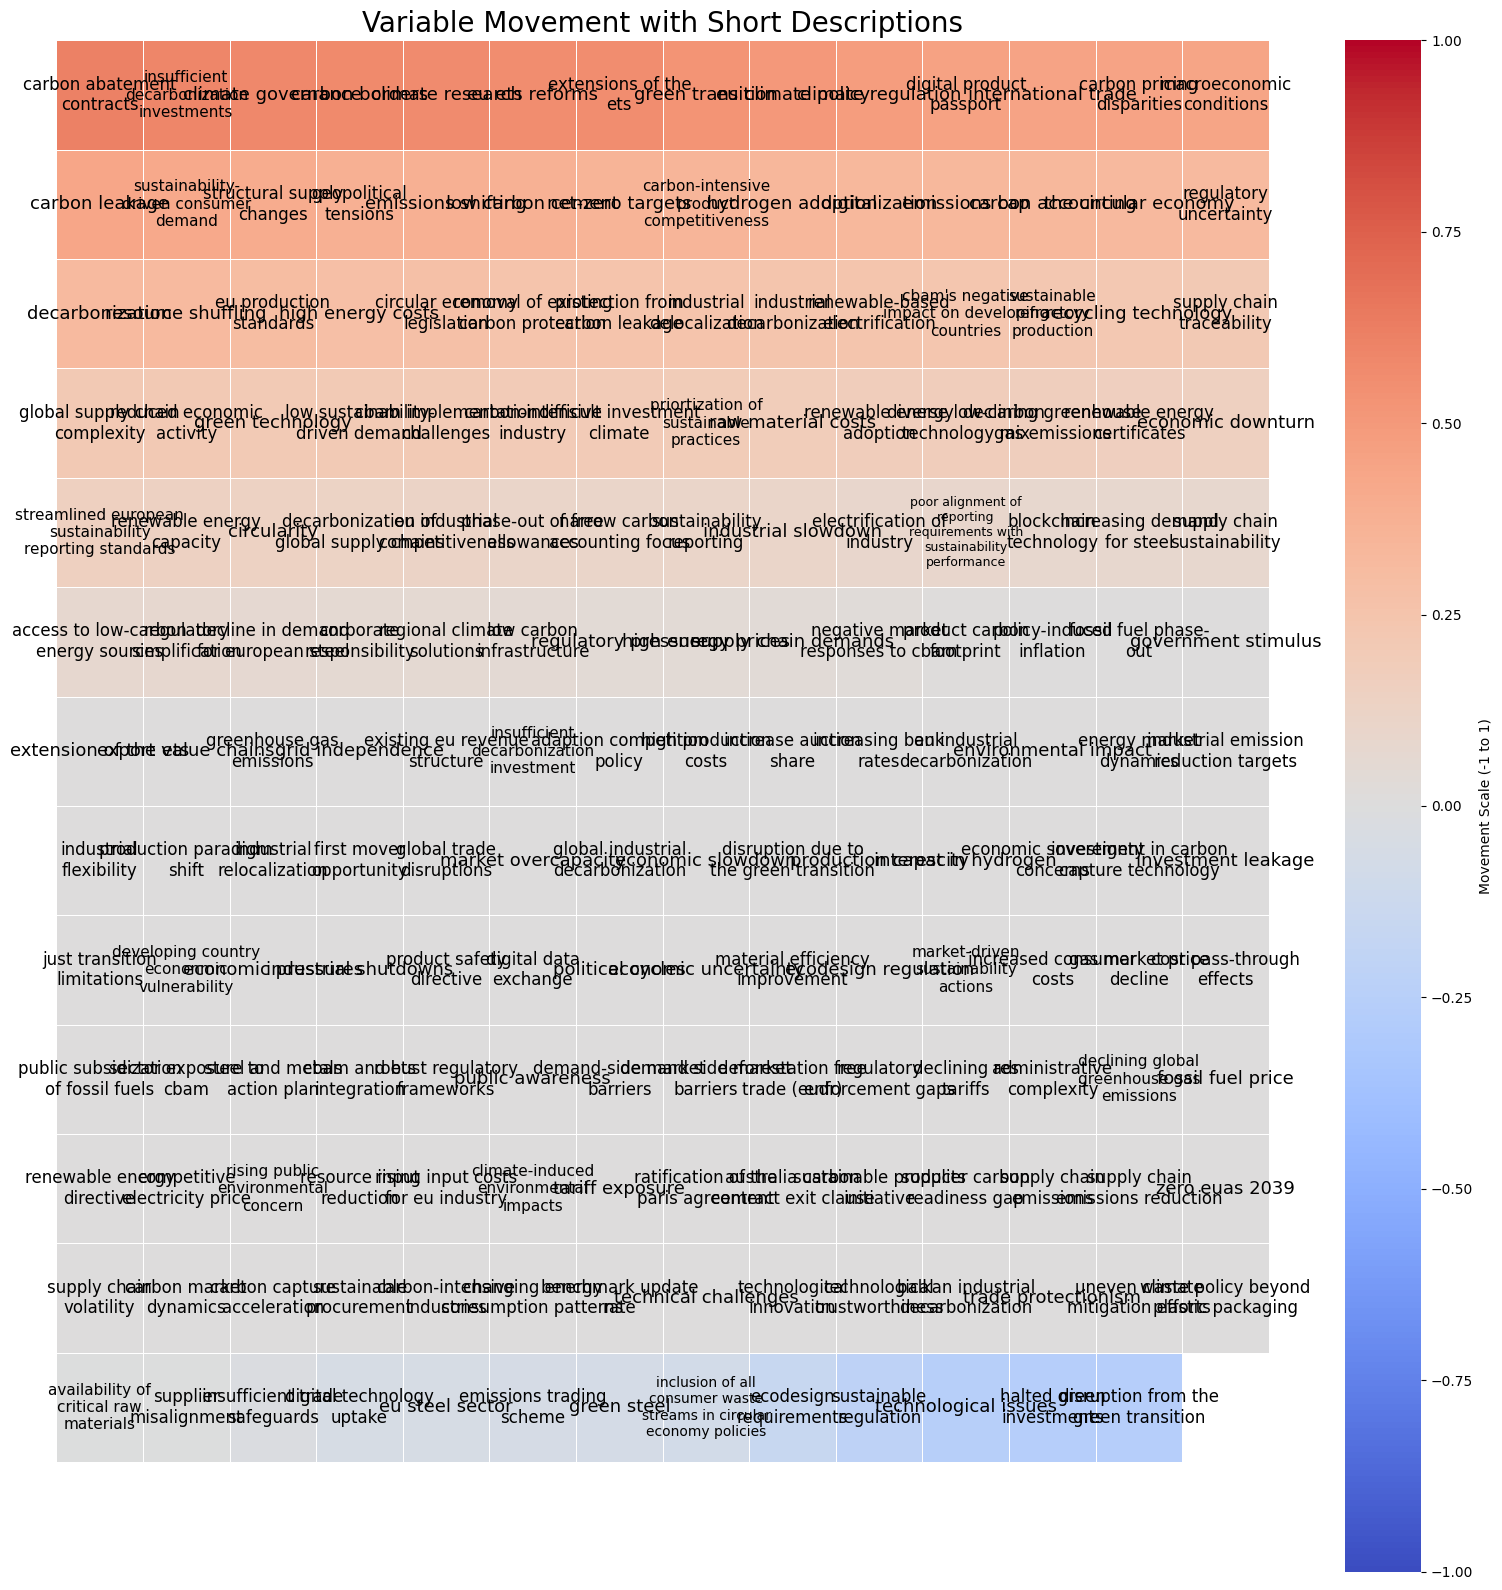

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap

# Sort by value to make visualization more coherent
df = df.sort_values(by="value", ascending=False).reset_index(drop=True)

# Calculate the grid size
grid_size = int(np.ceil(np.sqrt(len(df))))

# Initialize the figure
fig, ax = plt.subplots(figsize=(16, 16))

# Create a blank data matrix to hold the values
heatmap_data = np.full((grid_size, grid_size), np.nan, dtype=float)

# Fill the heatmap data with values
for i in range(len(df)):
    row = i // grid_size
    col = i % grid_size
    heatmap_data[row, col] = df.loc[i, "value"]

# Create the heatmap
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    center=0,
    annot=False,
    cbar_kws={'label': 'Movement Scale (-1 to 1)'},
    ax=ax,
    linewidths=0.5,
    linecolor='white',
    vmin=-1, vmax=1
)

# Add wrapped text inside each box
for i in range(len(df)):
    row = i // grid_size
    col = i % grid_size
    
    # Wrap the description into multiple lines
    wrapped_desc = "\n".join(textwrap.wrap(df.loc[i, "short_desc"], width=20))
    
    # Adjust font size based on the length of the description
    font_size = max(6, 14 - len(wrapped_desc.split("\n")))

    # Display the text inside the heatmap cell
    ax.text(col + 0.5, row + 0.5, wrapped_desc,
            ha='center', va='center', fontsize=font_size, color='black', wrap=True)

# Set title
plt.title("Variable Movement with Short Descriptions", fontsize=20)
plt.axis('off')  # Hide the grid lines for a cleaner look
plt.tight_layout()
plt.show()

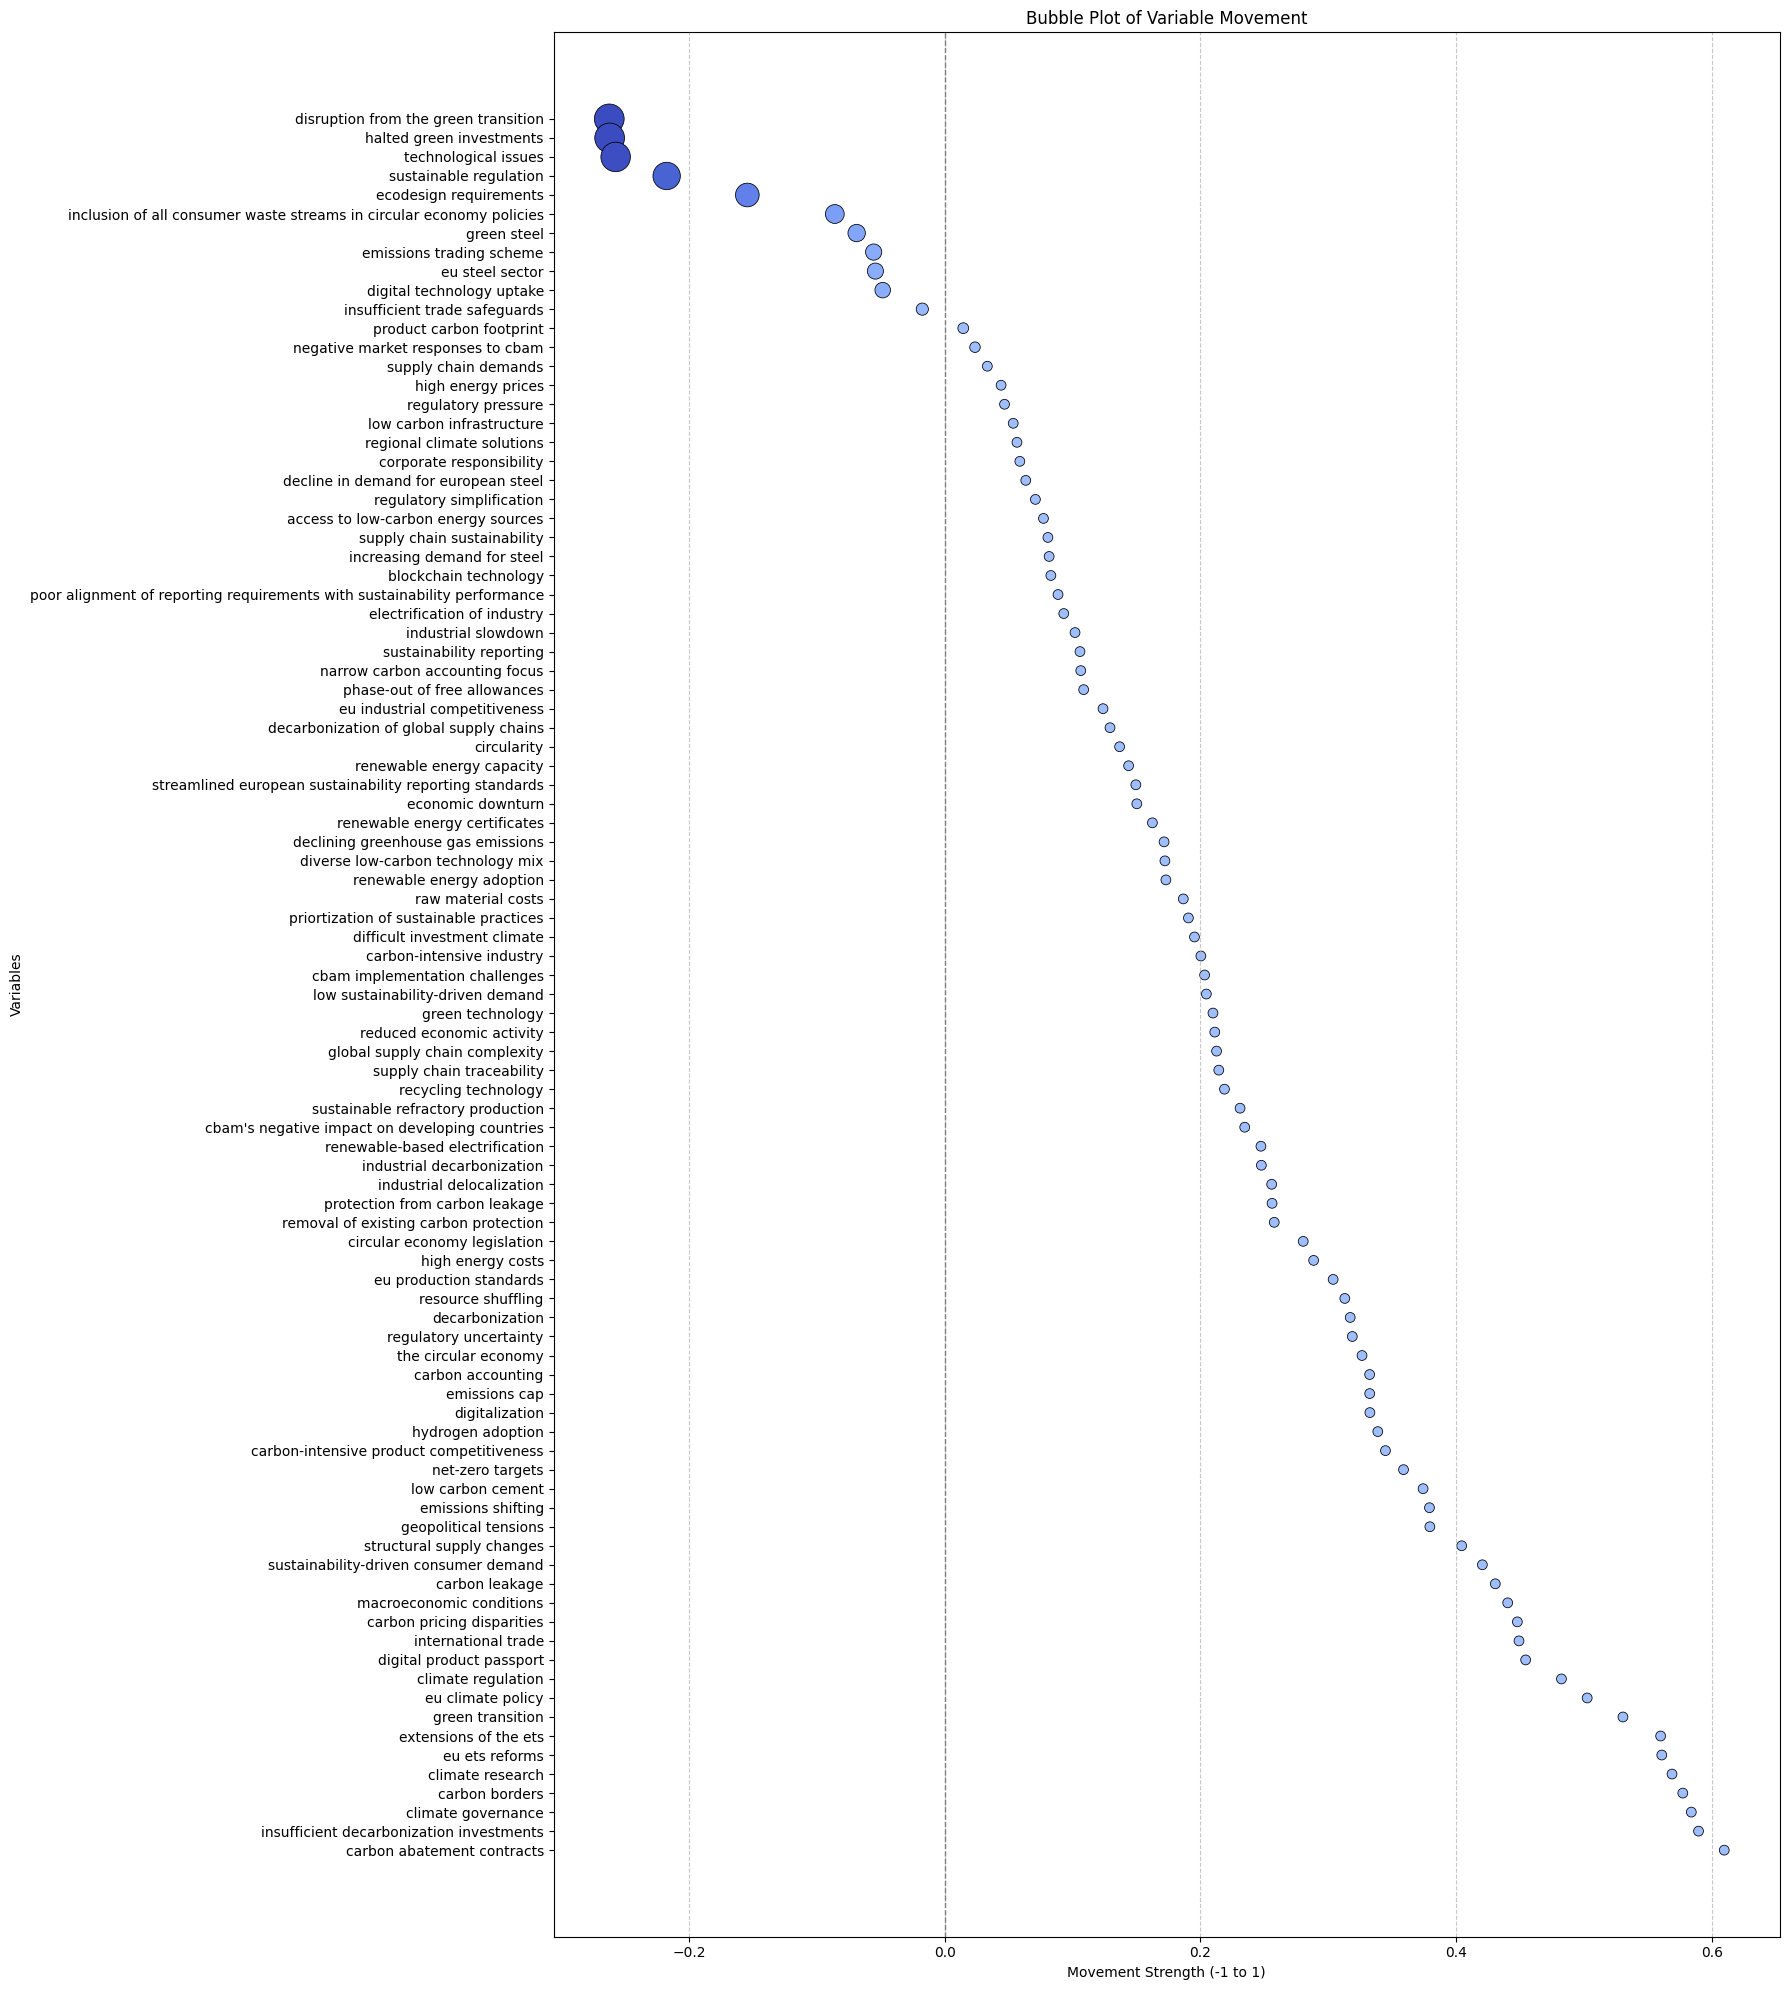

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the threshold for significant movement
threshold = 0.01

# Filter out values close to zero
filtered_df = df[abs(df["value"]) > threshold].copy()

# Sort by value for better visualization
filtered_df = filtered_df.sort_values(by="value", ascending=True).reset_index(drop=True)

# Configure the plot
plt.figure(figsize=(18, 20))

# Create the bubble plot
sns.scatterplot(
    data=filtered_df,
    x="value",
    y="short_desc",
    size=abs(df["value"]),  # Size proportional to magnitude
    sizes=(50, 1000),       # Adjust bubble size range
    hue=df["value"],        # Color based on movement direction
    palette="coolwarm",     # Blue for negative, red for positive
    edgecolor="black",
    legend=False
)

# Add title and axis labels
plt.title("Bubble Plot of Variable Movement")
plt.xlabel("Movement Strength (-1 to 1)")
plt.ylabel("Variables")

# Add grid lines for better readability
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

In [14]:
# Map each variable (short description) to a category
category_map = {
    # 1. Policy & Regulatory
    "cbam implementation challenges": "Policy & Regulatory",
    "renewable energy certificates": "Policy & Regulatory",
    "renewable energy directive": "Policy & Regulatory",
    "carbon accounting": "Policy & Regulatory",
    "carbon pricing policy": "Policy & Regulatory",
    "extension of the ets": "Policy & Regulatory",
    "net-zero targets": "Policy & Regulatory",
    "phase-out of free allowances": "Policy & Regulatory",
    "streamlined european sustainability reporting standards": "Policy & Regulatory",
    "carbon borders": "Policy & Regulatory",
    "eu climate policy": "Policy & Regulatory",
    "eu ets reforms": "Policy & Regulatory",
    "eu production standards": "Policy & Regulatory",
    "harmonized carbon pricing": "Policy & Regulatory",
    "regulatory pressure": "Policy & Regulatory",
    "regulatory simplification": "Policy & Regulatory",
    "regulatory uncertainty": "Policy & Regulatory",
    "cbam and ets integration": "Policy & Regulatory",
    "sector exposure to cbam": "Policy & Regulatory",
    "cbam's negative impact on developing countries": "Policy & Regulatory",
    "removal of existing carbon protection": "Policy & Regulatory",
    "steel and metals action plan": "Policy & Regulatory",
    "just transition limitations": "Policy & Regulatory",
    "circular economy legislation": "Policy & Regulatory",
    "priortization of sustainable practices": "Policy & Regulatory",
    "fossil fuel phase-out": "Policy & Regulatory",
    "inclusion of all consumer waste streams in circular economy policies": "Policy & Regulatory",
    "regulatory certainty": "Policy & Regulatory",
    "narrow carbon accounting focus": "Policy & Regulatory",
    "climate governance": "Policy & Regulatory",
    "climate regulation": "Policy & Regulatory",
    "insufficient trade safeguards": "Policy & Regulatory",
    "emissions cap": "Policy & Regulatory",
    "industrial emission reduction targets": "Policy & Regulatory",
    "ratification of the paris agreement": "Policy & Regulatory",
    "benchmark update rate": "Policy & Regulatory",
    "regulatory harmonization": "Policy & Regulatory",
    "increase auction share": "Policy & Regulatory",
    "ecodesign requirements": "Policy & Regulatory",
    "ecodesign regulation": "Policy & Regulatory",
    "product safety directive": "Policy & Regulatory",
    "sustainable products initiative": "Policy & Regulatory",
    "emissions trading scheme": "Policy & Regulatory",
    "administrative complexity": "Policy & Regulatory",
    "zero euas 2039": "Policy & Regulatory",
    "adaption competition policy": "Policy & Regulatory",
    "extensions of the ets": "Policy & Regulatory",
    "public subsidization of fossil fuels": "Policy & Regulatory",
    "political cycles": "Policy & Regulatory",
    "waste policy beyond plastic packaging": "Policy & Regulatory",
    "poor alignment of reporting requirements with sustainability performance": "Policy & Regulatory",
    "deforestation free trade (eudr)": "Policy & Regulatory",
    "sustainability reporting": "Policy & Regulatory",
    "sustainable regulation": "Policy & Regulatory",
    "australia carbon contract exit clause": "Policy & Regulatory",
    "carbon abatement contracts": "Policy & Regulatory",
    "eu cbam": "Policy & Regulatory",
    "carbon pricing disparities": "Policy & Regulatory",
    "product carbon footprint": "Policy & Regulatory",
    "regulatory enforcement gaps": "Policy & Regulatory",
    "robust regulatory frameworks": "Policy & Regulatory",

    # 2. Economic & Financial
    "high energy costs": "Economic & Financial",
    "high production costs": "Economic & Financial",
    "carbon price": "Economic & Financial",
    "fossil fuel price": "Economic & Financial",
    "policy-induced inflation": "Economic & Financial",
    "reduced economic activity": "Economic & Financial",
    "eu industrial competitiveness": "Economic & Financial",
    "economic slowdown": "Economic & Financial",
    "government stimulus": "Economic & Financial",
    "economic downturn": "Economic & Financial",
    "macroeconomic conditions": "Economic & Financial",
    "high energy prices": "Economic & Financial",
    "economic uncertainty": "Economic & Financial",
    "investment leakage": "Economic & Financial",
    "cost pass-through effects": "Economic & Financial",
    "existing eu revenue structure": "Economic & Financial",
    "increased consumer costs": "Economic & Financial",
    "industrial shutdowns": "Economic & Financial",
    "industrial slowdown": "Economic & Financial",
    "insufficient decarbonization investments": "Economic & Financial",
    "insufficient decarbonization investment": "Economic & Financial",
    "economic pressures": "Economic & Financial",
    "increasing bank rates": "Economic & Financial",
    "raw material costs": "Economic & Financial",
    "rising input costs for eu industry": "Economic & Financial",
    "declining res tariffs": "Economic & Financial",
    "market overcapacity": "Economic & Financial",
    "halted green investments": "Economic & Financial",
    "difficult investment climate": "Economic & Financial",

    # 3. Market & Trade
    "alternative fuel penetration": "Market & Trade",
    "access to low-carbon energy sources": "Market & Trade",
    "renewable energy adoption": "Market & Trade",
    "resource shuffling": "Market & Trade",
    "negative market responses to cbam": "Market & Trade",
    "carbon-intensive industries": "Market & Trade",
    "carbon-intensive product competitiveness": "Market & Trade",
    "decline in demand for european steel": "Market & Trade",
    "global trade disruptions": "Market & Trade",
    "demand-side market barriers": "Market & Trade",
    "market-driven sustainability actions": "Market & Trade",
    "increasing demand for steel": "Market & Trade",
    "interest in hydrogen": "Market & Trade",
    "changing energy consumption patterns": "Market & Trade",
    "competitive electricity price": "Market & Trade",
    "tariff exposure": "Market & Trade",
    "export value chains": "Market & Trade",
    "international trade": "Market & Trade",
    "green steel": "Market & Trade",
    "sustainability-driven consumer demand": "Market & Trade",
    "low sustainability-driven demand": "Market & Trade",
    "first mover opportunity": "Market & Trade",
    "trade protectionism": "Market & Trade",
    "gas market price decline": "Market & Trade",
    "global carbon price": "Market & Trade",
    "carbon market dynamics": "Market & Trade",
    "energy market dynamics": "Market & Trade",
    "global cbam adoption": "Market & Trade",
    "protection from carbon leakage": "Market & Trade",
    "carbon leakage": "Market & Trade",
    "renewable energy capacity": "Market & Trade",
    "eu steel sector": "Market & Trade",

    # 4. Technological & Innovation
    "adoption of clean technology": "Technological & Innovation",
    "digitalization": "Technological & Innovation",
    "blockchain technology": "Technological & Innovation",
    "digital data exchange": "Technological & Innovation",
    "technological trustworthiness": "Technological & Innovation",
    "carbon capture technology": "Technological & Innovation",
    "carbon capture acceleration": "Technological & Innovation",
    "technological innovation": "Technological & Innovation",
    "technical challenges": "Technological & Innovation",
    "material efficiency improvement": "Technological & Innovation",
    "recycling technology": "Technological & Innovation",
    "digital infrastructure": "Technological & Innovation",
    "digital product passport": "Technological & Innovation",
    "hydrogen-based electrification": "Technological & Innovation",
    "technological issues": "Technological & Innovation",
    "electrification of industry": "Technological & Innovation",
    "industrial flexibility": "Technological & Innovation",
    "green technology": "Technological & Innovation",
    "renewable-based electrification": "Technological & Innovation",
    "sustainable refractory production": "Technological & Innovation",
    "diverse low-carbon technology mix": "Technological & Innovation",
    "grid independence": "Technological & Innovation",
    "production paradigm shift": "Technological & Innovation",
    "investment in carbon capture technology": "Technological & Innovation",
    "digital technology uptake": "Technological & Innovation",

    # 5. Environmental & Climate
    "declining greenhouse gas emissions": "Environmental & Climate",
    "greenhouse gas emissions": "Environmental & Climate",
    "global climate ambition": "Environmental & Climate",
    "uneven climate mitigation efforts": "Environmental & Climate",
    "decarbonization": "Environmental & Climate",
    "decarbonization of global supply chains": "Environmental & Climate",
    "industrial decarbonization": "Environmental & Climate",
    "eu industrial decarbonization": "Environmental & Climate",
    "global industrial decarbonization": "Environmental & Climate",
    "balkan industrial decarbonization": "Environmental & Climate",
    "resource input reduction": "Environmental & Climate",
    "supply chain emissions reduction": "Environmental & Climate",
    "environmental impact": "Environmental & Climate",
    "climate research": "Environmental & Climate",
    "green transition": "Environmental & Climate",
    "climate-induced environmental impacts": "Environmental & Climate",
    "declining global greenhouse gas emissions": "Environmental & Climate",
    "circularity": "Environmental & Climate",
    "low carbon cement": "Environmental & Climate",
    "low carbon infrastructure": "Environmental & Climate",
    "regional climate solutions": "Environmental & Climate",
    "the circular economy": "Environmental & Climate",

    # 6. Supply‑Chain & Infrastructure
    "availability of critical raw materials": "Supply‑Chain & Infrastructure",
    "supply chain volatility": "Supply‑Chain & Infrastructure",
    "global supply chain complexity": "Supply‑Chain & Infrastructure",
    "supply chain traceability": "Supply‑Chain & Infrastructure",
    "structural supply changes": "Supply‑Chain & Infrastructure",
    "industrial delocalization": "Supply‑Chain & Infrastructure",
    "production capacity": "Supply‑Chain & Infrastructure",
    "supplier misalignment": "Supply‑Chain & Infrastructure",
    "circular supply chains": "Supply‑Chain & Infrastructure",
    "supply chain sustainability": "Supply‑Chain & Infrastructure",
    "industrial relocalization": "Supply‑Chain & Infrastructure",
    "supply chain demands": "Supply‑Chain & Infrastructure",
    "supply chain emissions": "Supply‑Chain & Infrastructure",
    "supplier carbon readiness gap": "Supply‑Chain & Infrastructure",
    "sustainable procurement": "Supply‑Chain & Infrastructure",

    # 7. Social & Governance
    "geopolitical tensions": "Social & Governance",
    "global climate mitigation": "Social & Governance",
    "climate finance": "Social & Governance",
    "corporate responsibility": "Social & Governance",
    "rising public environmental concern": "Social & Governance",
    "public awareness": "Social & Governance",
    "developing country econonmic vulnerability": "Social & Governance",
    "just transition limitations": "Social & Governance",
    "economic sovereignty concerns": "Social & Governance",
    "international climate cooperation": "Social & Governance",
    "disruption from the green transition": "Social & Governance",
    "disruption due to the green transition": "Social & Governance"
}

In [17]:
# Map each variable to its category
df['category'] = df['short_desc'].map(category_map)
print(df)

     node     value                                short_desc  \
0     C56 -0.262219      disruption from the green transition   
1    C101 -0.261928                  halted green investments   
2    C194 -0.257234                      technological issues   
3    C190 -0.217344                    sustainable regulation   
4     C59 -0.154256                    ecodesign requirements   
..    ...       ...                                       ...   
176   C34  0.568854                          climate research   
177   C13  0.577285                            carbon borders   
178   C32  0.583939                        climate governance   
179  C121  0.589588  insufficient decarbonization investments   
180   C11  0.609699                carbon abatement contracts   

                       category  
0           Social & Governance  
1          Economic & Financial  
2    Technological & Innovation  
3           Policy & Regulatory  
4           Policy & Regulatory  
..             

c:\Users\Emilia\miniconda3\envs\lda-environment\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


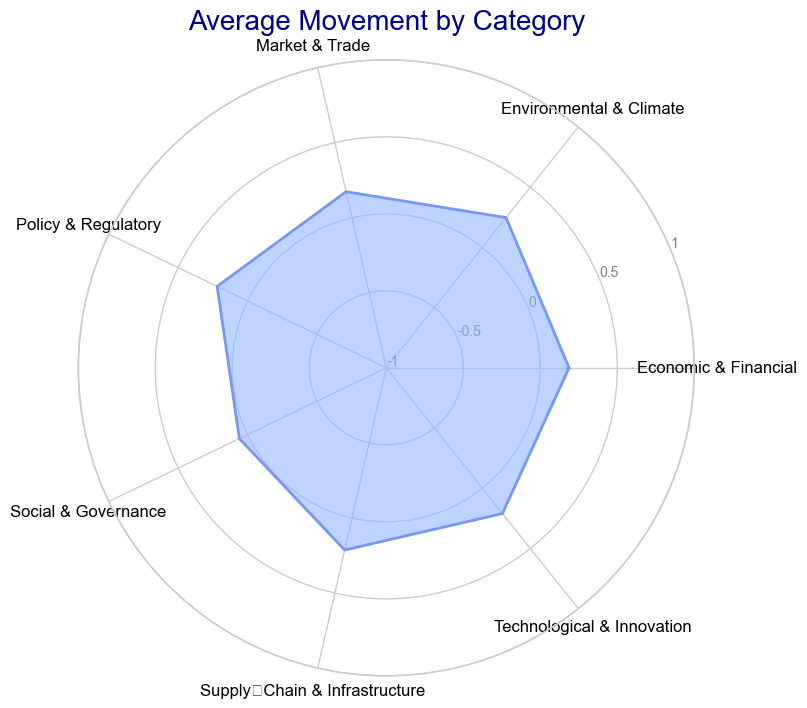

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

def radar_plot(categories, values):
    num_vars = len(categories)

    # Angles for each category axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    values += values[:1]

    # Initialize the radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    sns.set_palette("coolwarm")

    # Plot and fill
    ax.fill(angles, values, color=sns.color_palette("coolwarm", 10)[2], alpha=0.6)
    ax.plot(angles, values, color=sns.color_palette("coolwarm", 10)[1], linewidth=2)

    # Aesthetic tweaks
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, color='black')
    ax.set_ylim(-1, 1)
    ax.set_yticks([-1, -0.5, 0, 0.5, 1])
    ax.set_yticklabels(['-1', '-0.5', '0', '0.5', '1'], color='gray', size=10)
    plt.title('Average Movement by Category', size=20, color='darkblue')
    plt.show()

# Threshold for filtering small values
threshold = 0.01

# Filter out values close to zero
filtered_df = df[df['value'].abs() >= threshold]

# Group by category and calculate the median
category_agg = filtered_df.groupby('category')['value'].median().reset_index()

# Prepare data for the radar plot
categories = category_agg['category'].tolist()
values = category_agg['value'].tolist()

# Generate the radar plot
radar_plot(categories, values)

## 3.2 Second Try

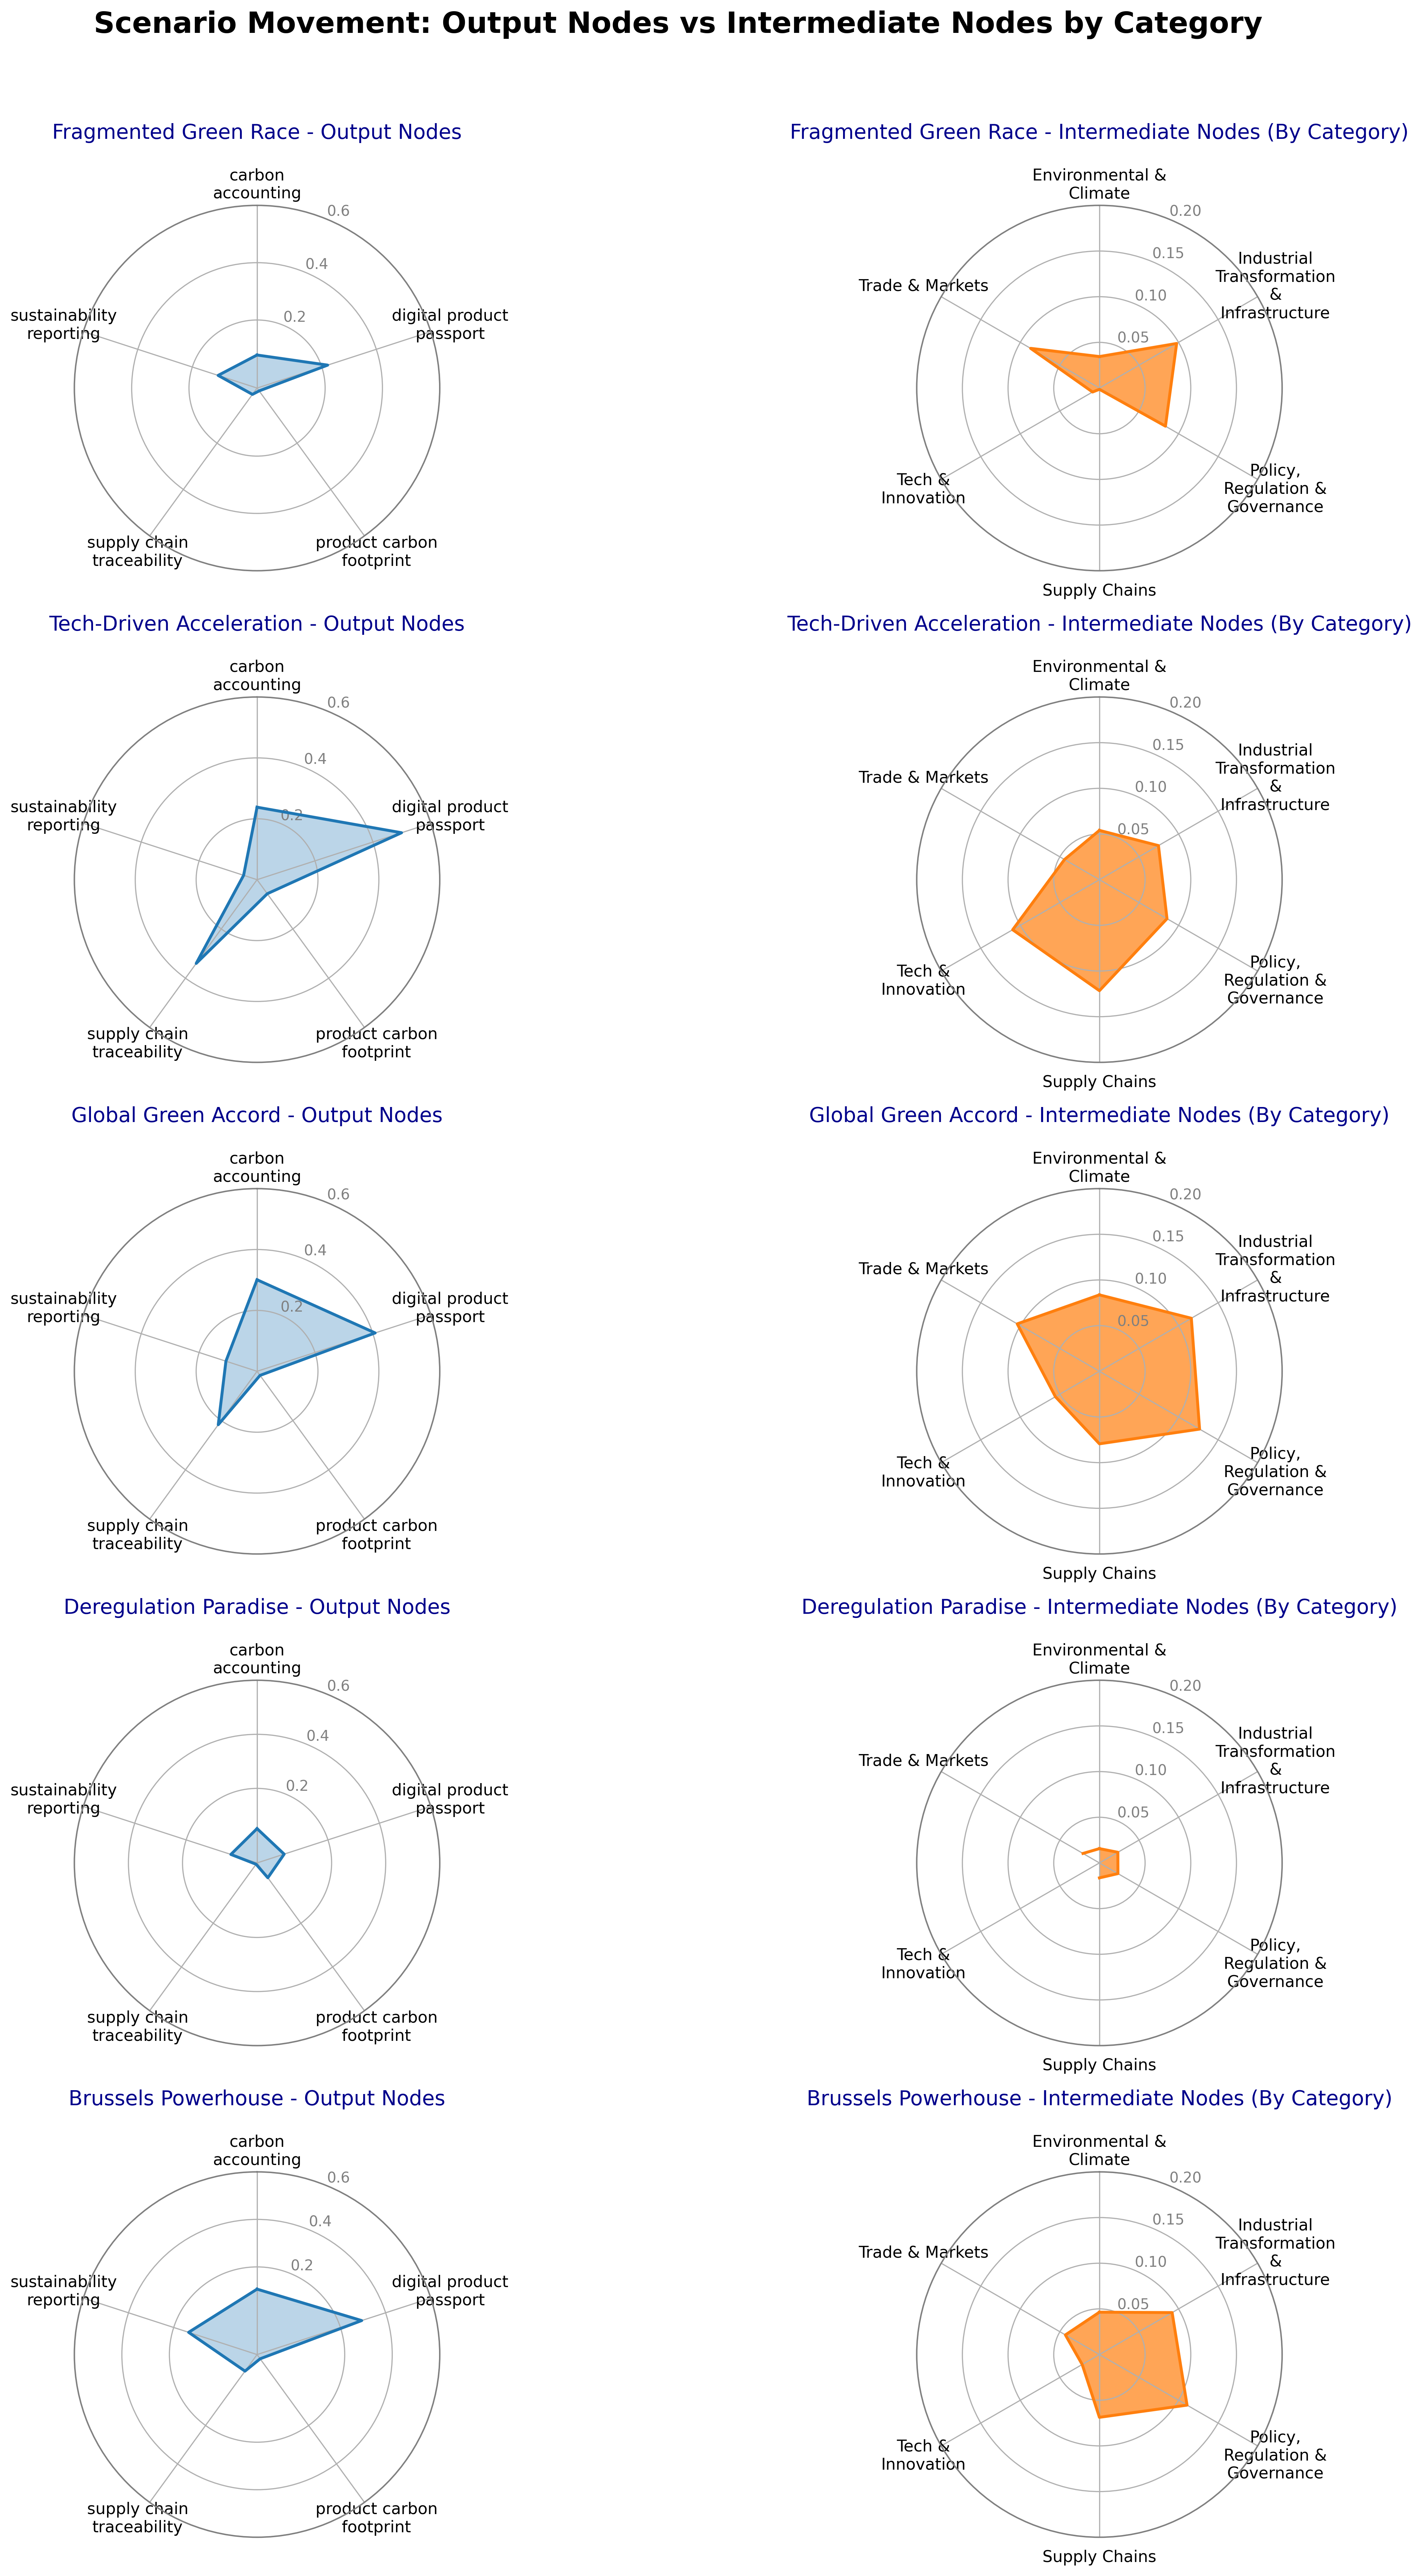

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from textwrap import wrap

def create_radar(ax, data, title, color='#1f77b4'):
    labels = data['short_desc']
    values = data['value'].tolist()
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    ax.spines['polar'].set_visible(True)
    ax.spines['polar'].set_color('gray')
    ax.spines['polar'].set_linewidth(1)

    ax.plot(angles, values, linewidth=2, linestyle='solid', color=color)
    ax.fill(angles, values, color=color, alpha=0.3)

    ax.set_yticks([0.2, 0.4, 0.6])
    ax.set_yticklabels(["0.2", "0.4", "0.6"], color='gray', size=10)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['\n'.join(wrap(label, 15)) for label in labels], size=11, color='black')

    ax.set_title(title, size=14, color='darkblue', pad=20)

def create_radar_categories(ax, df, title):
    # Aggregate intermediate nodes by category (mean or sum)
    cat_data = df.groupby('category')['value'].mean().reset_index()

    labels = cat_data['category'].tolist()
    values = cat_data['value'].tolist()
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    ax.spines['polar'].set_visible(True)
    ax.spines['polar'].set_color('gray')
    ax.spines['polar'].set_linewidth(1)

    ax.plot(angles, values, linewidth=2, linestyle='solid', color='#ff7f0e')
    ax.fill(angles, values, color='#ff7f0e', alpha=0.3)

    ax.set_ylim(0, 0.2)  # Set different scale here

    ax.set_yticks([0.05, 0.10, 0.15, 0.20])
    ax.set_yticklabels(["0.05", "0.10", "0.15", "0.20"], color='gray', size=10)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['\n'.join(wrap(label, 15)) for label in labels], size=11, color='black')

    ax.set_title(title, size=14, color='darkblue', pad=20)

num_scenarios = len(scenario_data)
fig, axes = plt.subplots(num_scenarios, 2, subplot_kw=dict(polar=True), figsize=(18, 5 * num_scenarios), dpi=300)
fig.suptitle('Scenario Movement: Output Nodes vs Intermediate Nodes by Category', size=20, color='black', weight='bold')

# Flatten axes if only one scenario
if num_scenarios == 1:
    axes = [axes[0], axes[1]]

for i, (scenario, df) in enumerate(scenario_data.items()):
    output_df = df[df['type'] == 'output']
    intermediate_df = df[df['type'] == 'intermediate']

    create_radar(axes[i, 0], output_df, f"{scenario} - Output Nodes")
    create_radar_categories(axes[i, 1], intermediate_df, f"{scenario} - Intermediate Nodes (By Category)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 3.3 Try three

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from textwrap import wrap

def create_radar(ax, data, title, color='#1f77b4', alpha_fill=0.5, grid_color='lightgray'):
    labels = data['short_desc']
    values = data['value'].tolist()
    num_vars = len(labels)

    # compute angles
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]

    # setup polar axis
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # lighten grid
    ax.grid(True, color=grid_color, linewidth=0.8, linestyle='--')
    ax.spines['polar'].set_visible(True)
    ax.spines['polar'].set_color(grid_color)
    ax.spines['polar'].set_linewidth(1)

    # plot
    ax.plot(angles, values, linewidth=1.5, linestyle='solid', color=color)
    ax.fill(angles, values, color=color, alpha=alpha_fill)

    # ticks
    ax.set_yticks([0.2, 0.4, 0.6])
    ax.set_yticklabels(["0.2", "0.4", "0.6"], color='gray', size=9)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['\n'.join(wrap(label, 15)) for label in labels],
                       size=10, color='black')

    # title
    ax.set_title(title, size=12, color=color, pad=15)

def create_radar_categories(ax, df, title, color='#ff7f0e', alpha_fill=0.5, grid_color='lightgray'):
    # aggregate by category
    cat_data = df.groupby('category')['value'].mean().reset_index()
    labels = cat_data['category'].tolist()
    values = cat_data['value'].tolist()
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    ax.grid(True, color=grid_color, linewidth=0.8, linestyle='--')
    ax.spines['polar'].set_visible(True)
    ax.spines['polar'].set_color(grid_color)
    ax.spines['polar'].set_linewidth(1)

    ax.plot(angles, values, linewidth=1.5, linestyle='solid', color=color)
    ax.fill(angles, values, color=color, alpha=alpha_fill)

    ax.set_ylim(0, max(values) * 1.1)
    ax.set_yticks(np.linspace(0, max(values), 5))
    ax.set_yticklabels([f"{v:.2f}" for v in np.linspace(0, max(values), 5)],
                       color='gray', size=9)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['\n'.join(wrap(label, 15)) for label in labels],
                       size=10, color='black')

    ax.set_title(title, size=12, color=color, pad=15)

# ---- Main loop: one figure per scenario ----

for scenario, df in scenario_data.items():
    output_df = df[(df['type'] == 'output') & (df['short_desc'] != 'supply chain traceability')]
    intermediate_df = df[df['type'] == 'intermediate']

    # create figure with two side-by-side radars
    fig, (ax_left, ax_right) = plt.subplots(
        1, 2,
        subplot_kw=dict(polar=True),
        figsize=(12, 6),
        dpi=300,
        gridspec_kw={'wspace': 0.4}  # increase horizontal spacing
    )

    fig.suptitle(f"{scenario}",
                 size=16, weight='bold', y=1.05)

    # LEFT: intermediate by category
    create_radar_categories(
        ax_left,
        intermediate_df,
        title=f"CBAM Landsacpe Overview",
        alpha_fill=0.15,
        grid_color='#cccccc'
    )

    # RIGHT: output nodes
    create_radar(
        ax_right,
        output_df,
        title=f"Carbon Data Granularity",
        alpha_fill=0.15,
        grid_color='#cccccc'
    )

    #plt.tight_layout()
    # Save each figure separately at 300 dpi
    fig.savefig(f"{scenario.replace(' ', '_')}_nosupply_radars.png", dpi=300, bbox_inches='tight')
    plt.close(fig)

# 4. Output nodes

## 4.1 Try one

In [32]:
df_output = pd.DataFrame.from_dict(output_data, orient="index", columns=["value"]).reset_index()
df_output.rename(columns={"index": "node"}, inplace=True)

# Load node descriptions from Excel
nodes = pd.read_excel(ga_nodes_excel_path, sheet_name="nodes-order")

# Extract meaningful descriptions from node names
nodes["short_desc"] = nodes["node description"].str.replace(r"^S\d+\.\s*", "", regex=True)

In [48]:
# Merge data with descriptions
merged_df = df_output.merge(nodes[["nodes order", "short_desc"]], left_on="node", right_on="nodes order", how="left")

# Display the merged DataFrame
print("Merged DataFrame:")
print(merged_df)

# Prepare data for the radar plot
categories = merged_df['short_desc'].tolist()
values = merged_df['value'].tolist()

Merged DataFrame:
   node     value nodes order                 short_desc
0   C12  0.332396         C12          carbon accounting
1   C52  0.454390         C52   digital product passport
2   C54  0.332584         C54             digitalization
3  C144  0.014599        C144   product carbon footprint
4  C183  0.214429        C183  supply chain traceability


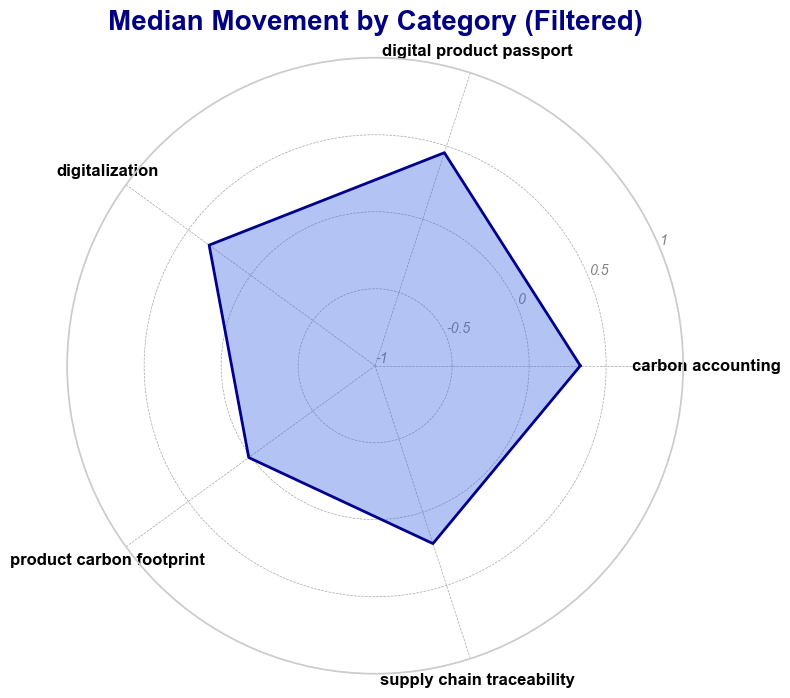

In [49]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

def aesthetic_radar_plot(categories, values):
    num_vars = len(categories)

    # Angles for each category axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    values += values[:1]

    # Initialize the radar plot with an aesthetic style
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    sns.set_palette("Paired")

    # Plot and fill with modern color and transparency
    ax.fill(angles, values, color='royalblue', alpha=0.4)
    ax.plot(angles, values, color='darkblue', linewidth=2)

    # Add category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, color='black', fontweight='bold')

    # Add radial labels with an elegant font and color
    ax.set_yticks([-1, -0.5, 0, 0.5, 1])
    ax.set_yticklabels(['-1', '-0.5', '0', '0.5', '1'], color='gray', size=10, fontstyle='italic')
    ax.tick_params(axis='y', labelsize=10, color='gray')

    # Add title with modern typography
    plt.title('Median Movement by Category (Filtered)', size=20, color='navy', fontweight='bold', pad=20)

    # Add gridlines for better readability
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    # Highlight the zero line for balance reference
    ax.axhline(0, color='gray', linewidth=1, linestyle='-', alpha=0.8)

    plt.show()

# Generate the aesthetic radar plot
aesthetic_radar_plot(categories, values)


## 4.2 Try 2 inspired by Eicke et al. 

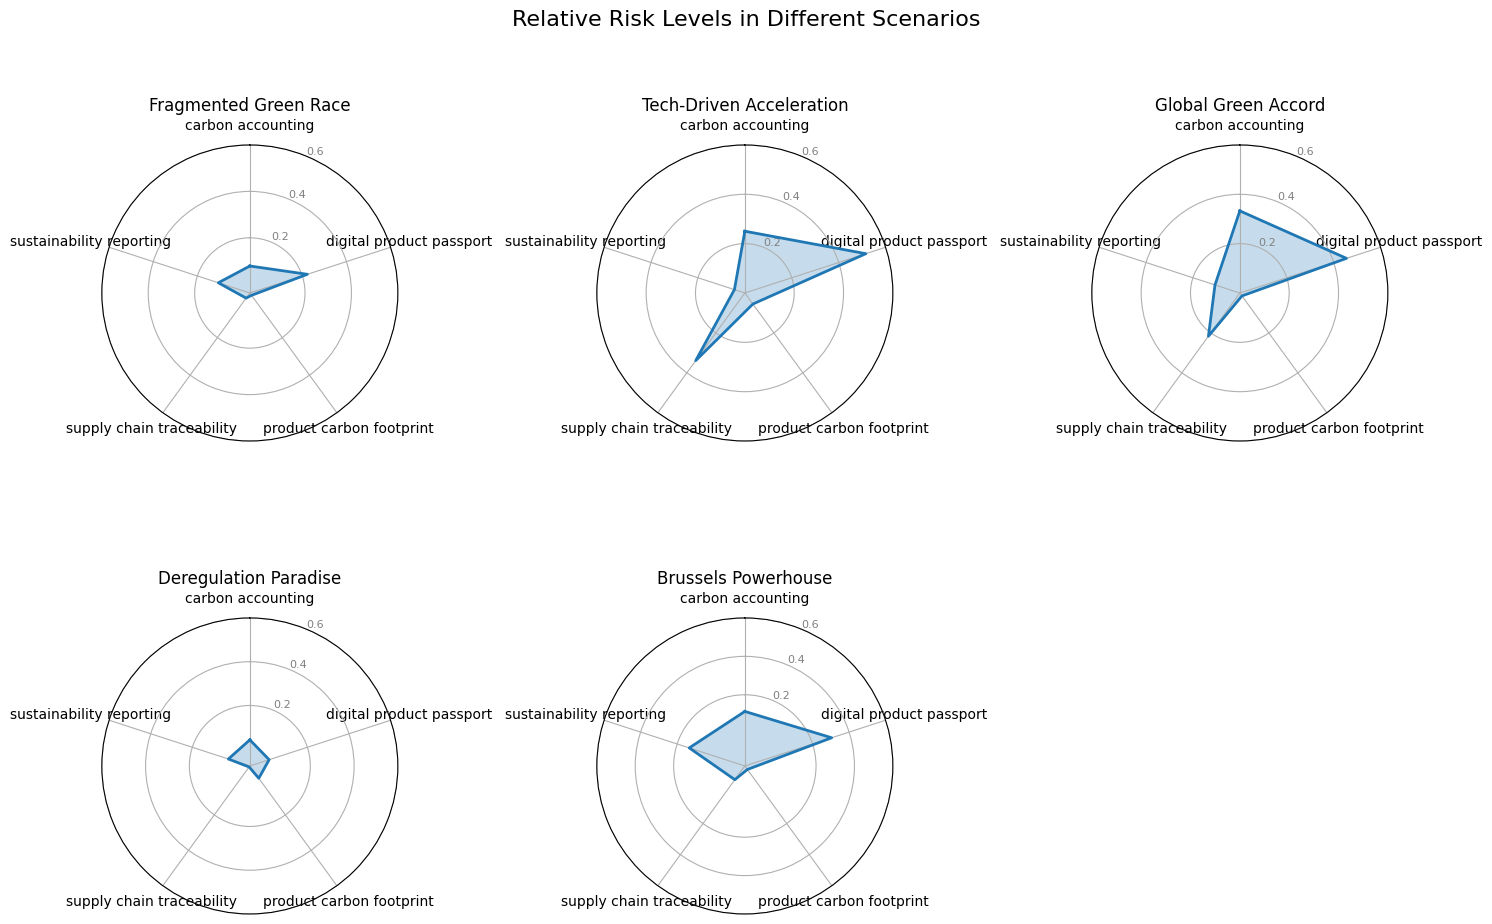

In [25]:
# Function to create a radar plot for a single scenario
def create_radar(ax, data, title):
    labels = data['short_desc']
    values = data['value'].tolist()
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw the outline of the radar chart
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

    # Draw one axe per variable and add labels
    ax.set_yticks([0.2, 0.4, 0.6])
    ax.set_yticklabels(["0.2", "0.4", "0.6"], color='gray', size=8)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(title, size=12, color='black')

# Optimized plot layout for five scenarios
fig, axes = plt.subplots(2, 3, subplot_kw=dict(polar=True), figsize=(15, 10))
fig.suptitle('Relative Risk Levels in Different Scenarios', size=16)
axes = axes.flatten()

for ax, (scenario, df) in zip(axes, scenario_data.items()):
    create_radar(ax, df[df['type'] == 'output'], scenario)

# Hide any unused subplots
for ax in axes[len(scenario_data):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

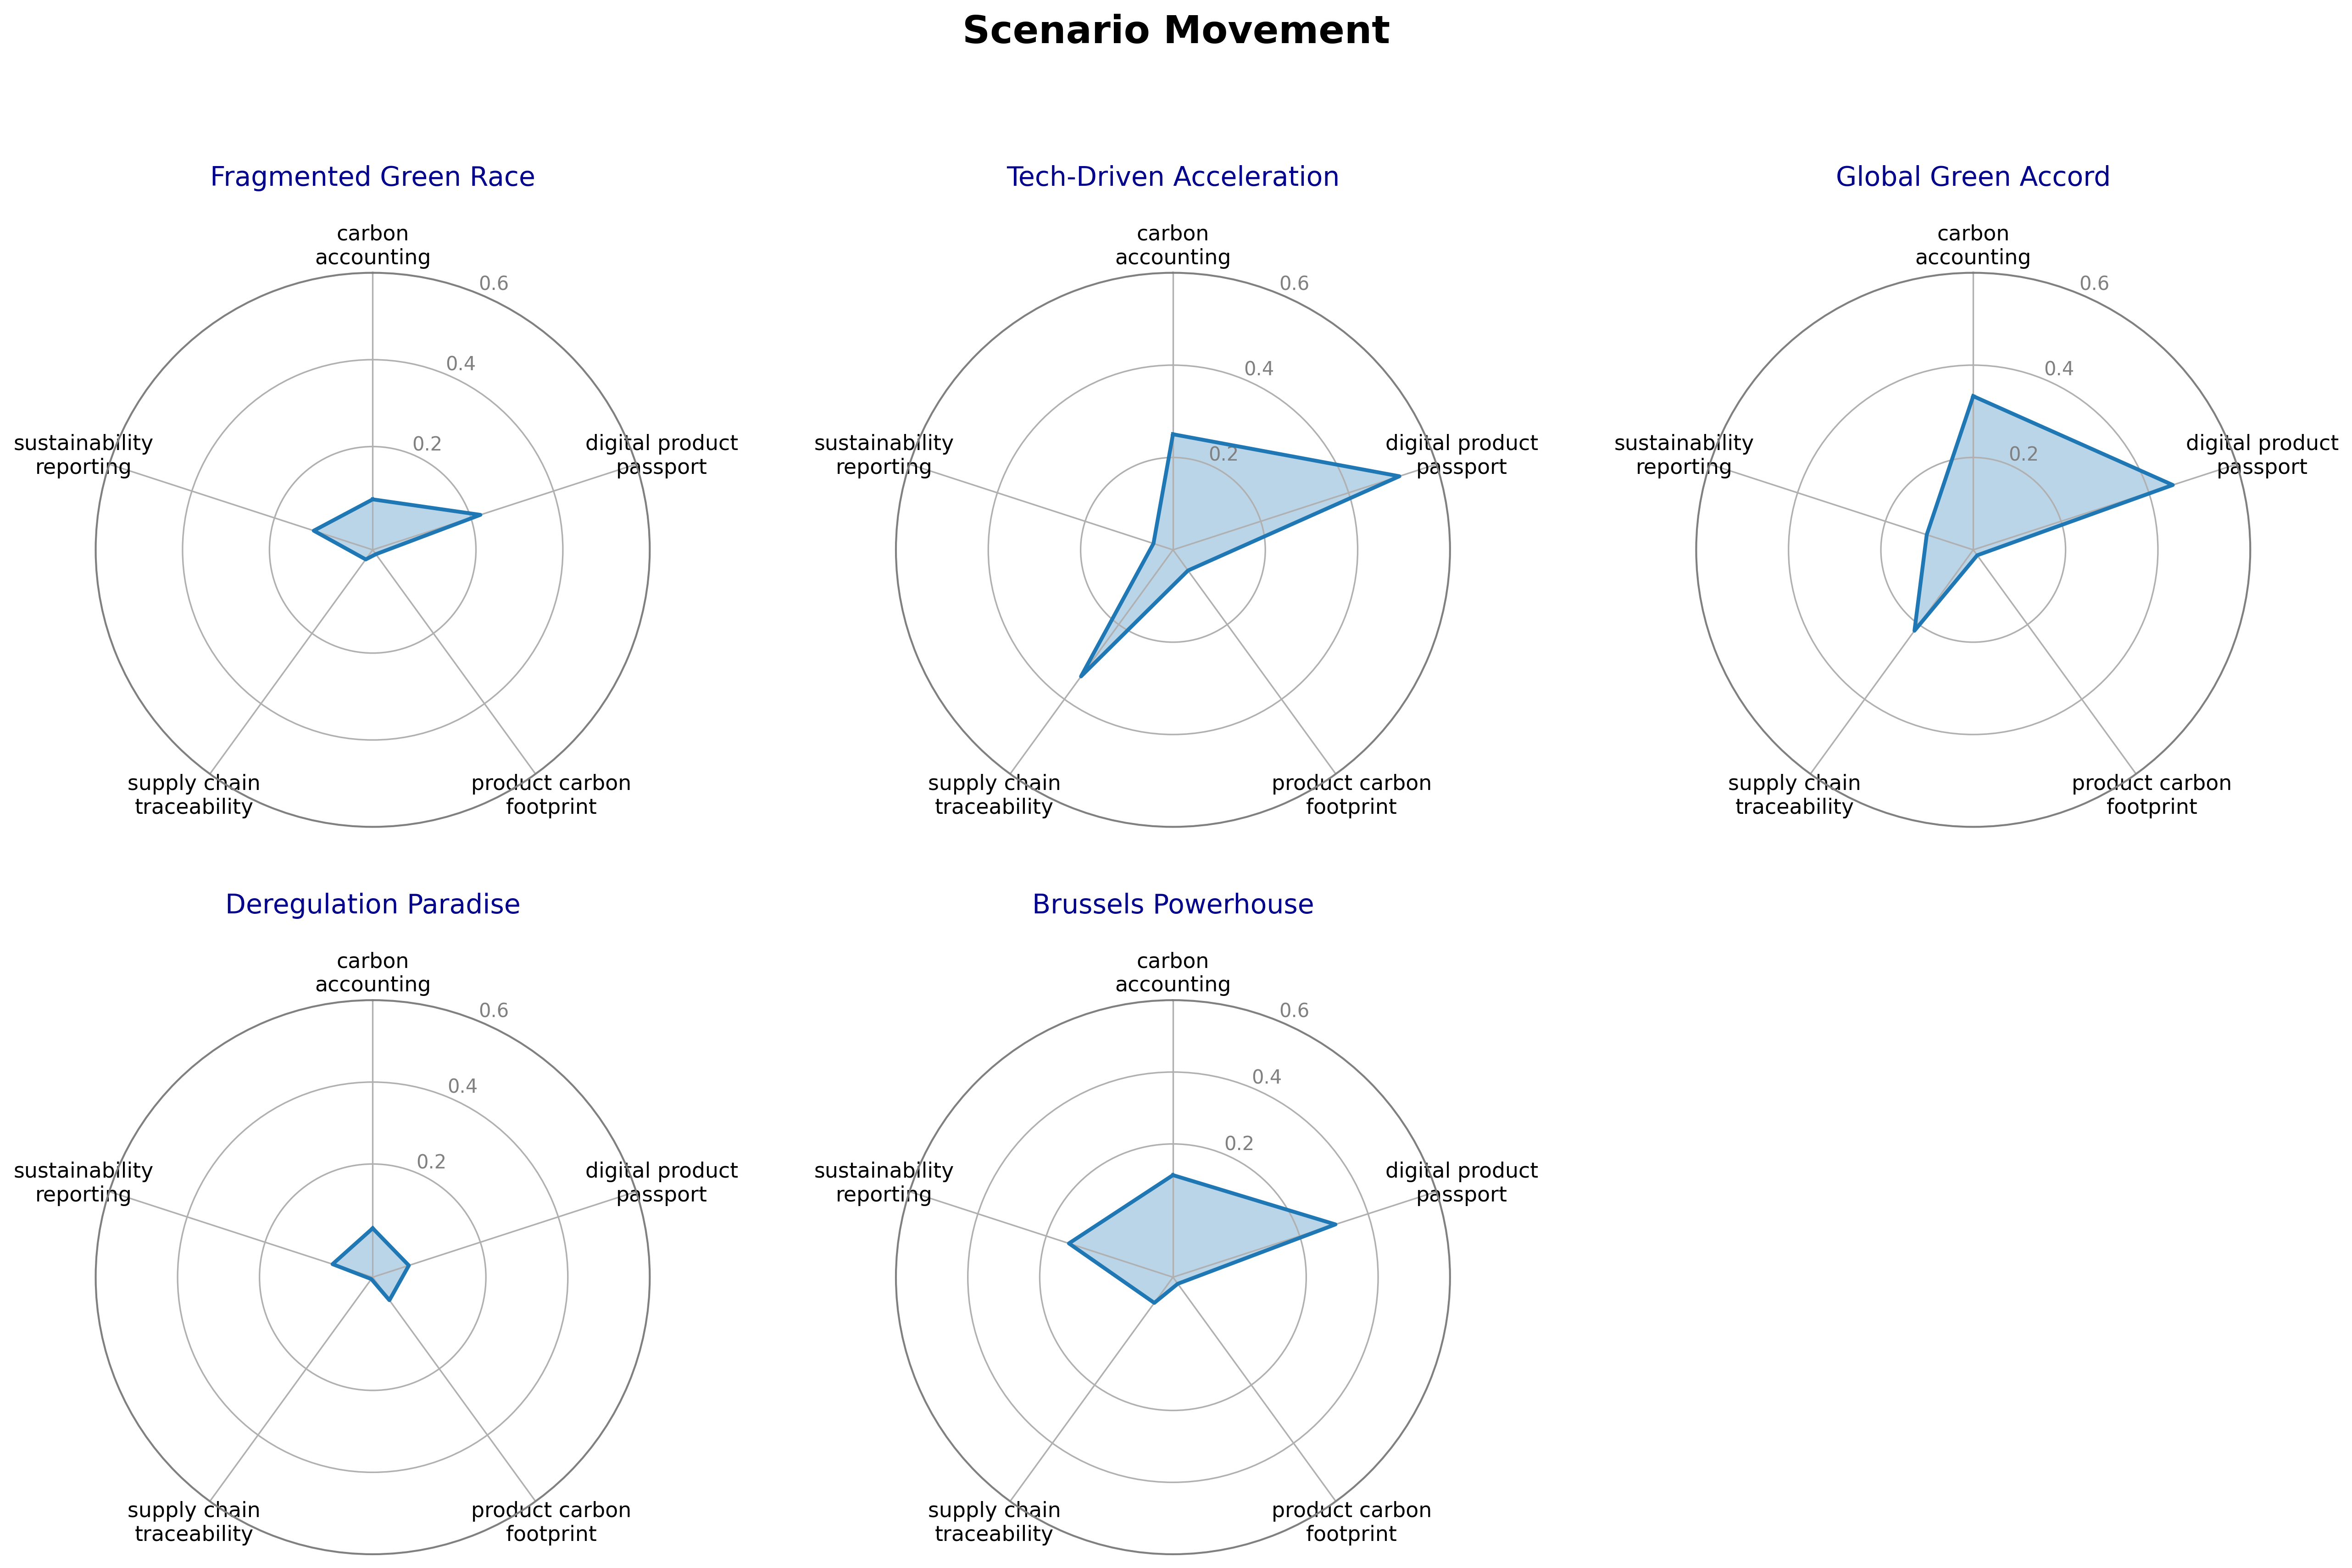

In [46]:
from textwrap import wrap

# Function to create a radar plot for a single scenario
def create_radar(ax, data, title):
    labels = data['short_desc']
    values = data['value'].tolist()
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Improved aesthetics
    ax.spines['polar'].set_visible(True)
    ax.spines['polar'].set_color('gray')
    ax.spines['polar'].set_linewidth(1)

    # Draw the outline of the radar chart
    ax.plot(angles, values, linewidth=2, linestyle='solid', color='#1f77b4')
    ax.fill(angles, values, color='#1f77b4', alpha=0.3)

    # Draw one axe per variable and add labels
    ax.set_yticks([0.2, 0.4, 0.6])
    ax.set_yticklabels(["0.2", "0.4", "0.6"], color='gray', size=10)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['\n'.join(wrap(label, 15)) for label in labels], size=11, color='black')
    #for angle, label in zip(angles[:-1], labels):
    #    ax.text(
    #        x=angle, 
    #        y=1.1,  # Slightly outside the plot
    #        s='\n'.join(wrap(label, 15)), 
    #        horizontalalignment='center', 
    #        verticalalignment='center', 
    #        size=11, 
    #        color='black', 
    #        transform=ax.get_xaxis_transform()
    #    )
    ax.set_title(title, size=14, color='darkblue', pad=20)

# Optimized plot layout for five scenarios
fig, axes = plt.subplots(2, 3, subplot_kw=dict(polar=True), figsize=(18, 12), dpi=300)
fig.suptitle('Scenario Movement', size=20, color='black', weight='bold')
axes = axes.flatten()

for ax, (scenario, df) in zip(axes, scenario_data.items()):
    create_radar(ax, df[df['type'] == 'output'], scenario)

# Hide any unused subplots
for ax in axes[len(scenario_data):]:
    ax.set_visible(False)

plt.tight_layout(pad=4)
plt.show()

## 4.3 One plot, all scenarios

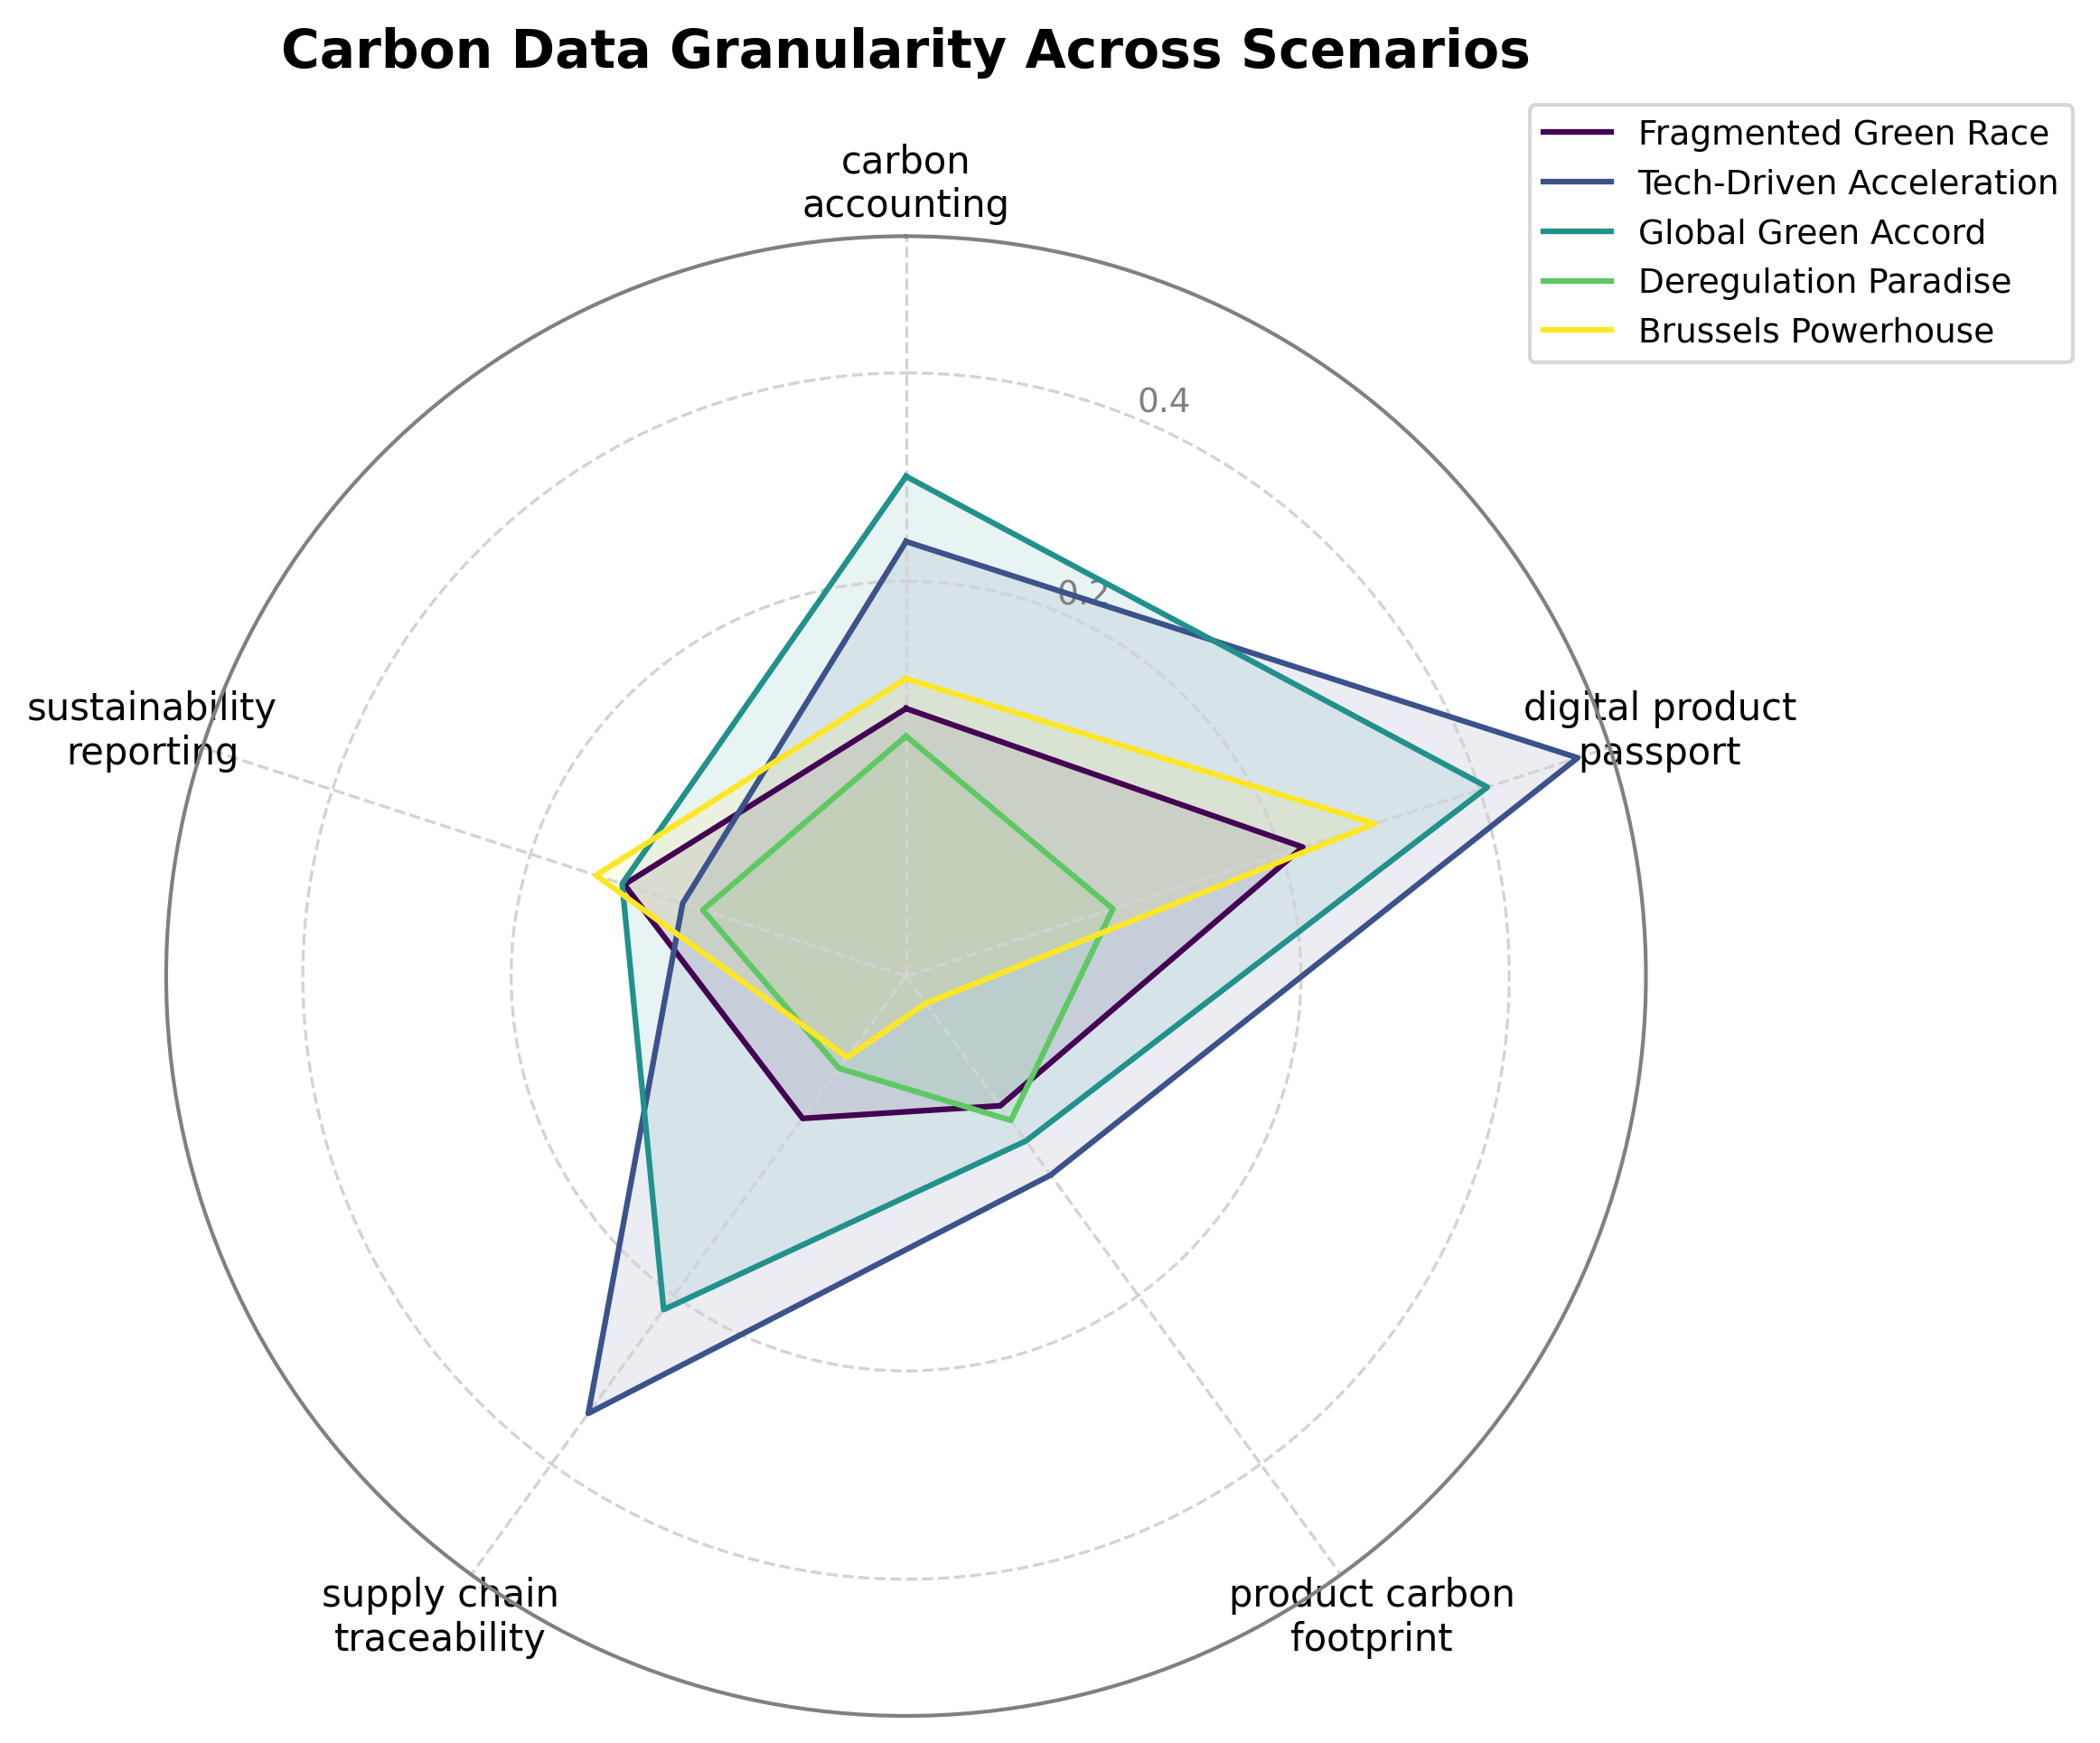

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from textwrap import wrap

def plot_multi_scenario_radar(scenario_data, value_type='output', title='Carbon Data Granularity Across Scenarios'):
    # Assume all scenarios share the same set of labels (important!)
    first_scenario = next(iter(scenario_data.values()))
    base_df = first_scenario[first_scenario['type'] == value_type]
    labels = base_df['short_desc'].tolist()
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # loop closure

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True), dpi=300)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Style grid and spine
    ax.grid(True, color='lightgray', linestyle='--', linewidth=0.8)
    ax.spines['polar'].set_color('gray')
    ax.spines['polar'].set_linewidth(1)

    # Axis ticks
    ax.set_yticks([0.2, 0.4, 0.6])
    ax.set_yticklabels(["0.2", "0.4", "0.6"], color='gray', size=9)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['\n'.join(wrap(label, 15)) for label in labels], size=10)

    # Plot each scenario
    colors = plt.cm.viridis(np.linspace(0, 1, len(scenario_data)))  # or tab10/tab20
    for color, (scenario, df) in zip(colors, scenario_data.items()):
        df_filtered = df[df['type'] == value_type].set_index('short_desc')
        values = df_filtered.reindex(labels)['value'].tolist()  # ensure correct order
        values += values[:1]  # loop closure

        ax.plot(angles, values, label=scenario, linewidth=1.5, color=color)
        ax.fill(angles, values, alpha=0.1, color=color)

    # Title and legend
    ax.set_title(title, size=14, weight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)

    plt.tight_layout()
    plt.show()

# Call the function
plot_multi_scenario_radar(scenario_data, value_type='output')

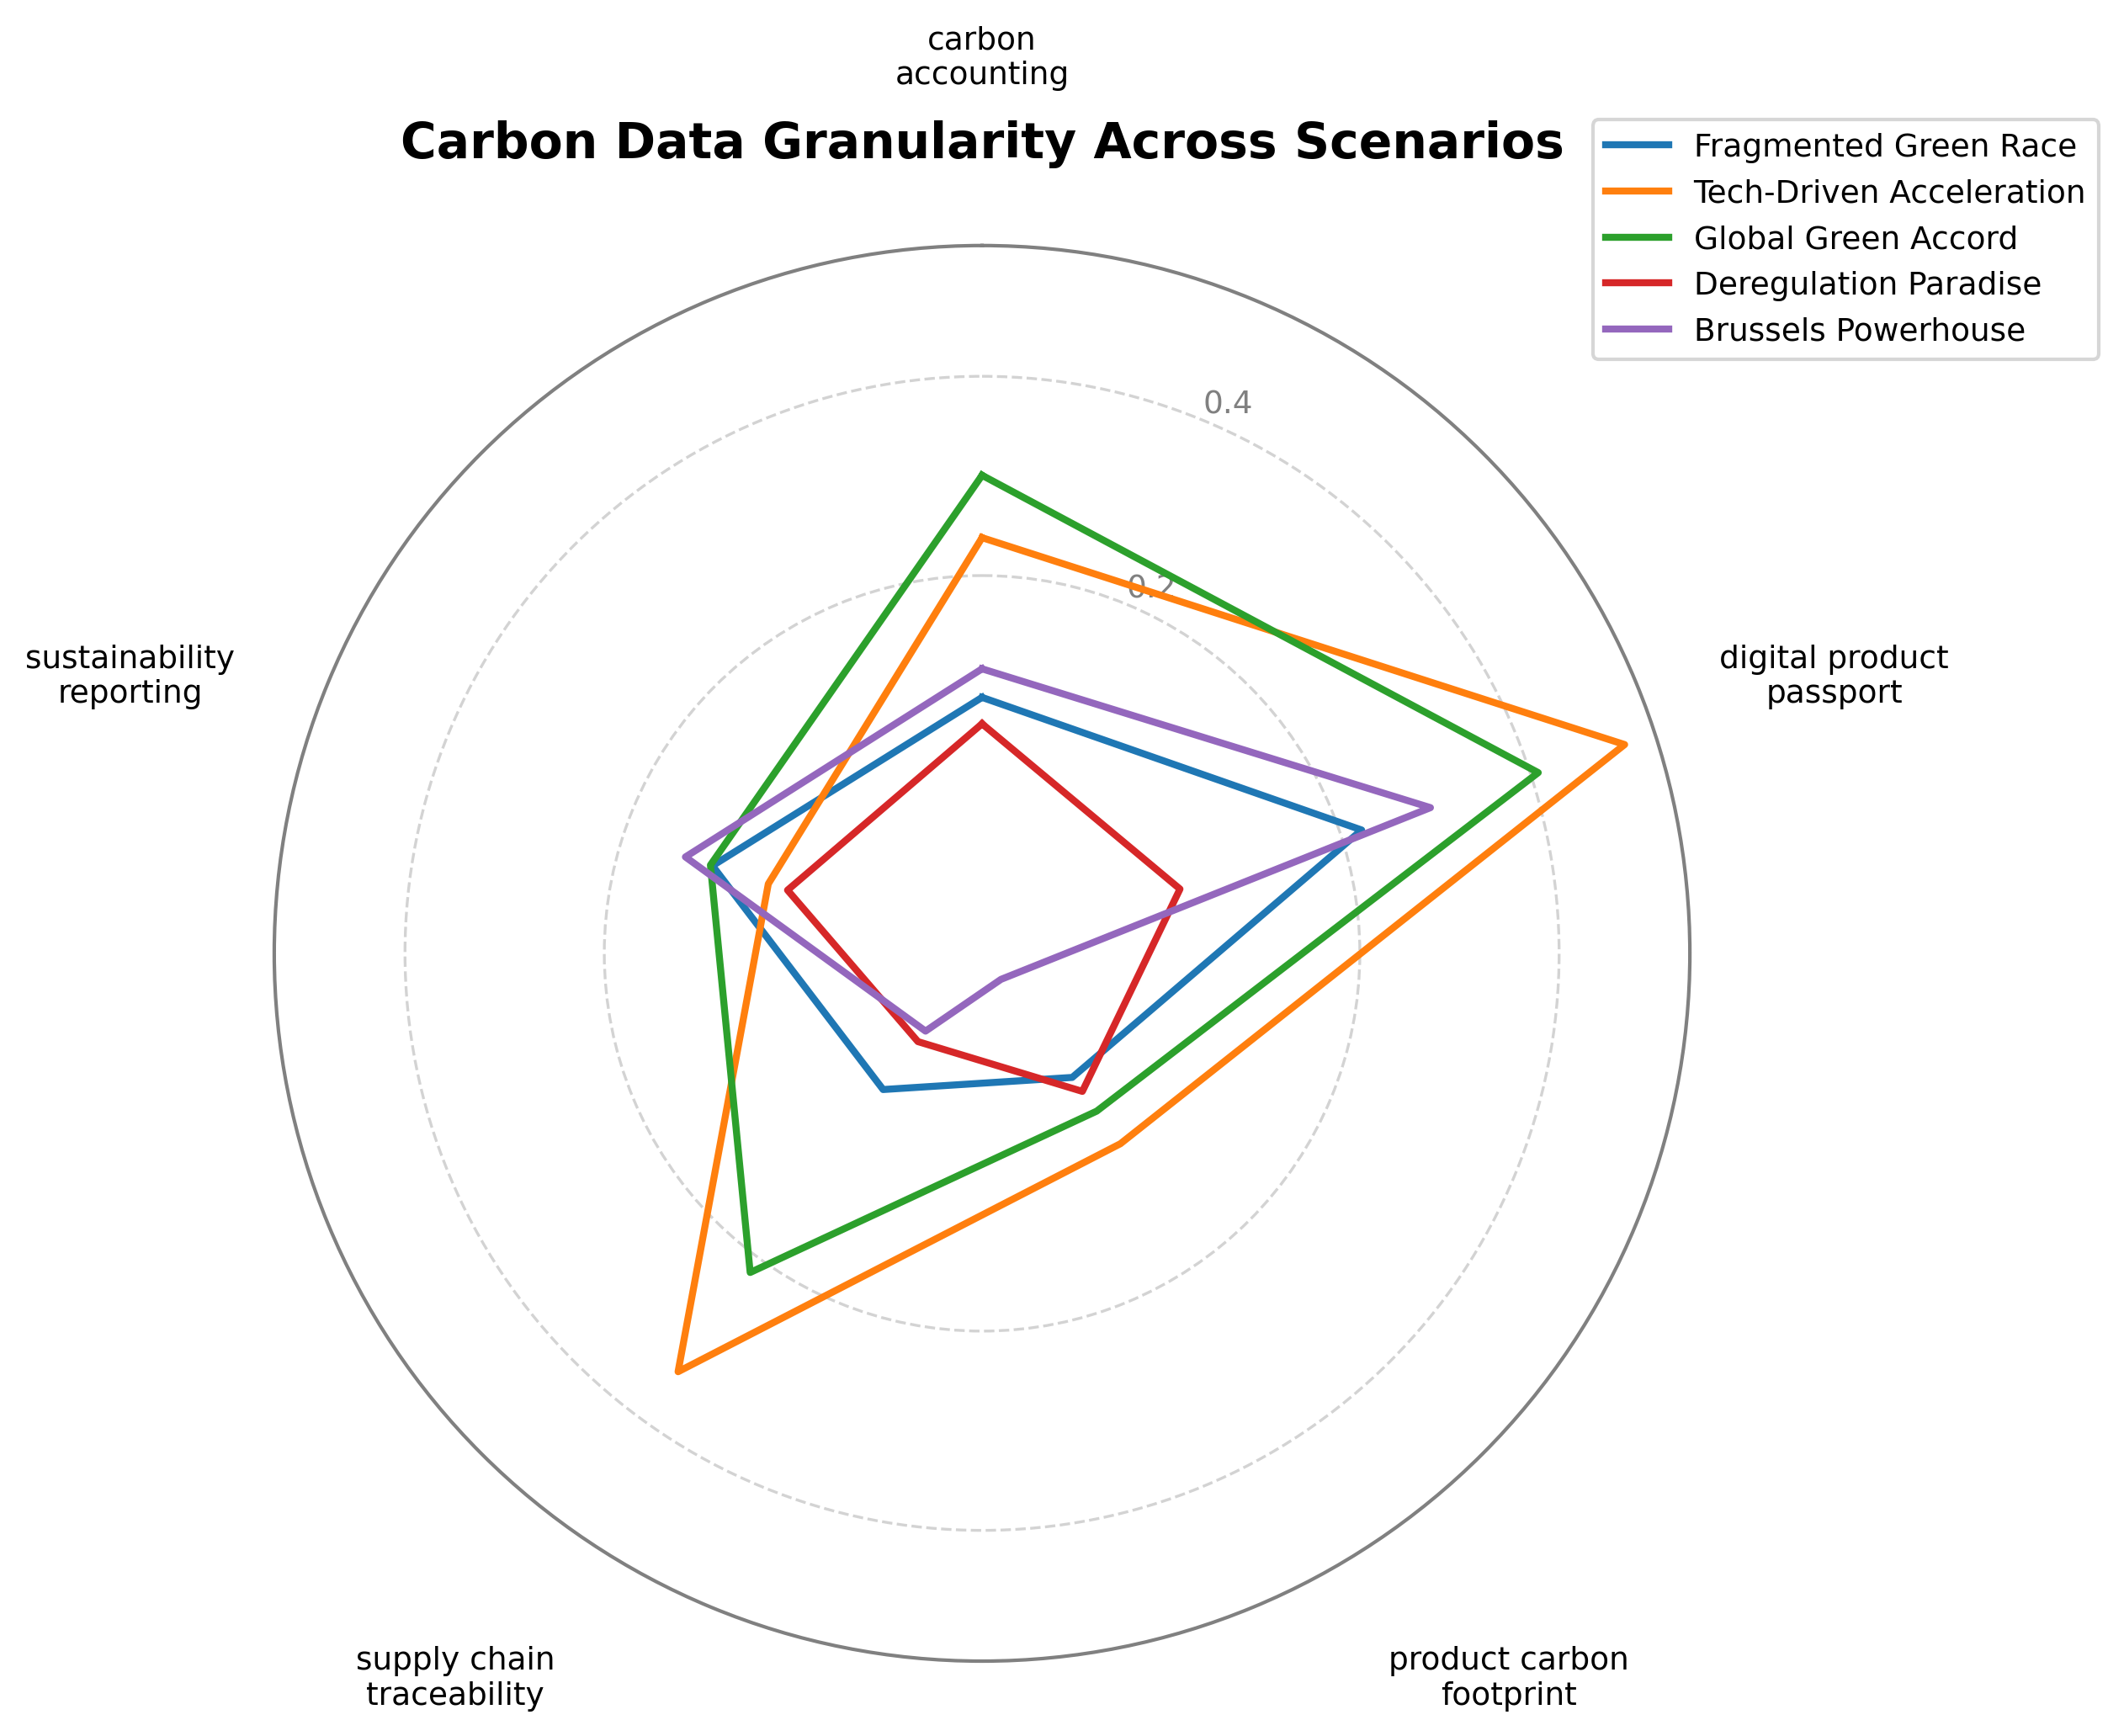

In [7]:
# Call the function
plot_multi_scenario_radar(scenario_data, value_type='output')

# Final 

## Landscape

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Combine intermediate data
all_intermediates = []

for scenario, df in scenario_data.items():
    intermediate_df = df[df['type'] == 'intermediate'].copy()
    intermediate_df['scenario'] = scenario
    all_intermediates.append(intermediate_df)

combined_df = pd.concat(all_intermediates, ignore_index=True)

# Average value by scenario and category
avg_df = combined_df.groupby(['scenario', 'category'])['value'].mean().reset_index()

# Sort scenarios so 'Deregulation paradise' is first
scenario_order = ['Deregulation Paradise'] + [s for s in avg_df['scenario'].unique() if s != 'Deregulation Paradise']
avg_df['scenario'] = pd.Categorical(avg_df['scenario'], categories=scenario_order, ordered=True)
avg_df.sort_values('scenario', inplace=True)

# Prepare data for plotting
scenarios = avg_df['scenario'].cat.categories
categories = avg_df['category'].dropna().unique()

# Aesthetic palette (colorblind-friendly, saturated)
colors = sns.color_palette("Set2", len(categories))
category_colors = dict(zip(categories, colors))

# Plotting setup
fig, ax = plt.subplots(figsize=(14, 7), dpi=300)

num_categories = len(categories)
x = np.arange(len(scenarios))
total_bar_width = 0.8
bar_width = total_bar_width / num_categories

# Plot bars with padding between groups
for i, category in enumerate(categories):
    values = []
    for scenario in scenarios:
        match = avg_df[(avg_df['scenario'] == scenario) & (avg_df['category'] == category)]
        values.append(match['value'].values[0] if not match.empty else 0)

    offset = (i - num_categories / 2) * bar_width + bar_width / 2
    ax.bar(x + offset, values, width=bar_width * 0.9,  # slight spacing
           color=category_colors[category],
           edgecolor=category_colors[category],
           label=category)

# X-axis and title
ax.set_xticks(x)
ax.set_xticklabels(scenarios, fontsize=10)
ax.set_title("CBAM Landscape Across Scenarios",
             fontsize=14, weight='bold', pad=20)
ax.set_xlabel("Scenario", fontsize=12, labelpad = 12)
ax.set_ylabel("Average Node Value", fontsize=12)
# remove tick‐marks but keep labels
ax.tick_params(axis='both', which='both', length=0)
# Gridlines and baseline
ax.yaxis.grid(True, linestyle='--', linewidth=0.8, color='lightgray')
ax.set_axisbelow(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Light gray plot border
for spine in ax.spines.values():
    spine.set_edgecolor('#cccccc')
    spine.set_linewidth(1)

# Compact legend inside plot
ax.legend(title="Category", fontsize=9, title_fontsize=10,
          loc='upper left', frameon=True)

plt.tight_layout()
#plt.show()
plt.savefig("landscape_spaced_bars.png", dpi=300, bbox_inches='tight')
plt.close()

## Carbon Data

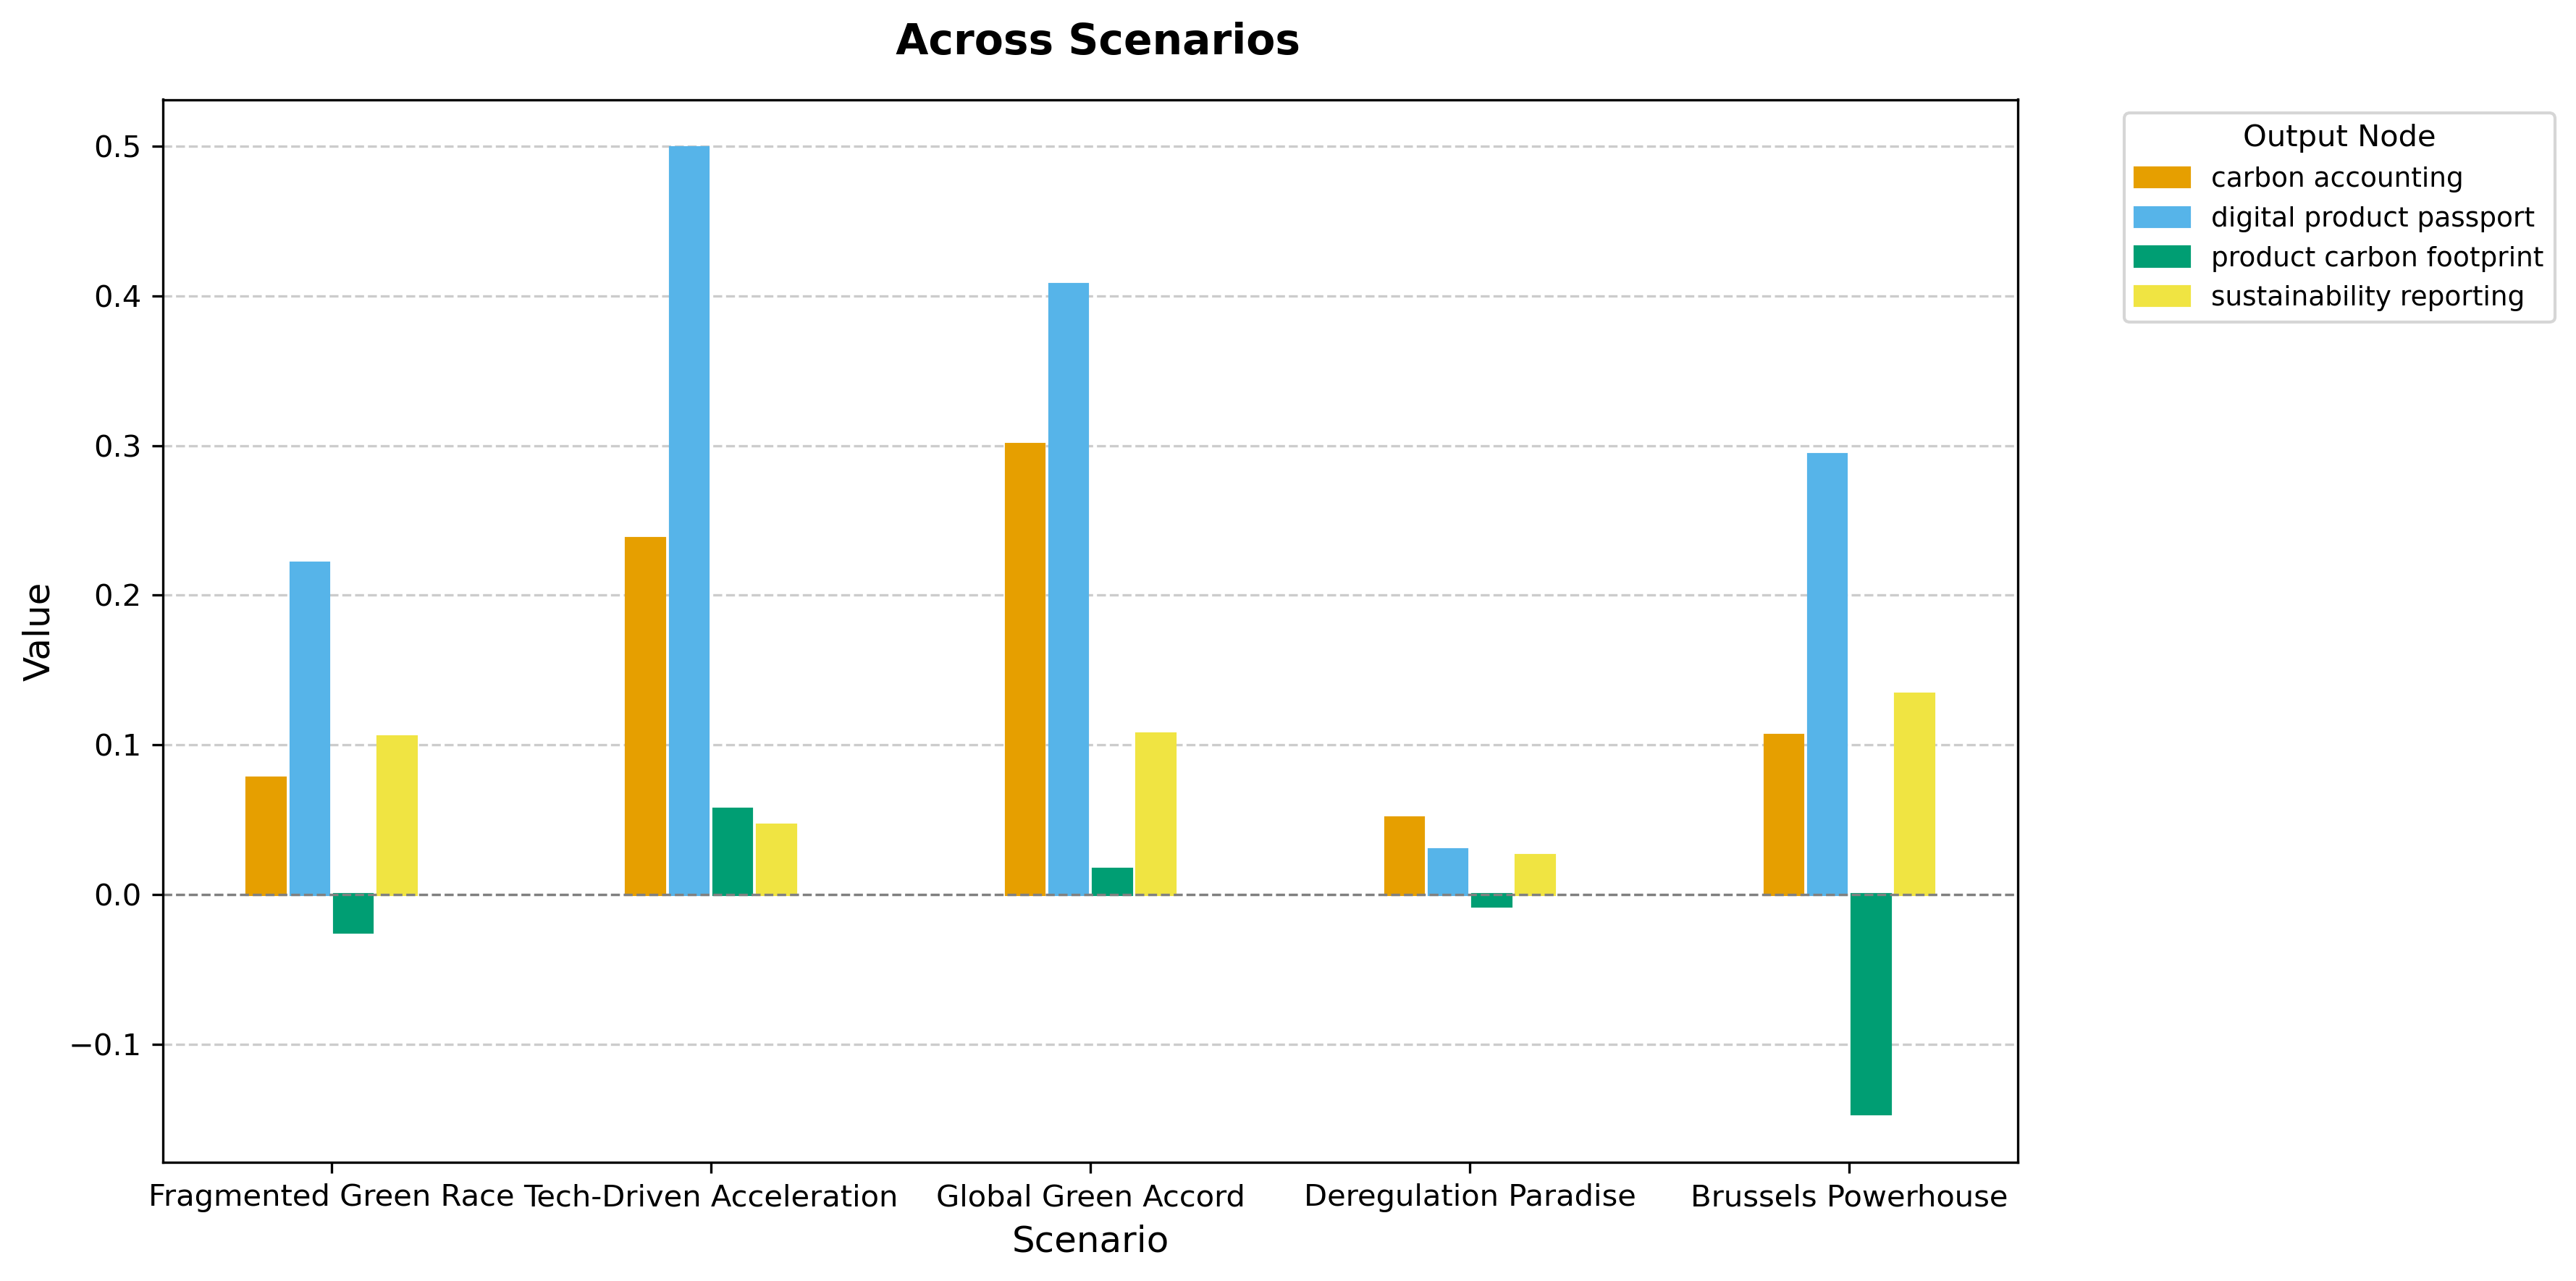

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Combine output data across scenarios, excluding supply chain traceability
all_outputs = []

for scenario, df in scenario_data.items():
    output_df = df[(df['type'] == 'output') & (df['short_desc'] != 'supply chain traceability')].copy()
    output_df['scenario'] = scenario
    all_outputs.append(output_df)

combined_df = pd.concat(all_outputs, ignore_index=True)
# Prepare data
scenarios = combined_df['scenario'].unique()
nodes = combined_df['short_desc'].unique()
colors = [
    "#E69F00", "#56B4E9", "#009E73", "#F0E442",
    "#0072B2", "#D55E00", "#CC79A7", "#999999"
][:len(nodes)]

# Create a mapping for node -> color
node_colors = dict(zip(nodes, colors))

# Plotting setup
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

bar_width = 0.1  # Narrow bar
padding = 0.015  # Space between bars

# Compute positions
x = np.arange(len(scenarios))
for i, node in enumerate(nodes):
    values = []
    for scenario in scenarios:
        val = combined_df[
            (combined_df['scenario'] == scenario) &
            (combined_df['short_desc'] == node)
        ]['value'].values
        values.append(val[0] if len(val) > 0 else 0)

    # Offset each bar by width + padding
    offset = (bar_width + padding) * i
    ax.bar(x + offset, values, width=bar_width,
           color=node_colors[node],
           edgecolor=node_colors[node],
           label=node)

# X-axis formatting
ax.set_xticks(x + ((bar_width + padding) * (len(nodes)-1)) / 2)
ax.set_xticklabels(scenarios, fontsize=10)

# Aesthetics
ax.set_title(" Across Scenarios", fontsize=14, weight='bold', pad=15)
ax.set_xlabel("Scenario", fontsize=12)
ax.set_ylabel("Value", fontsize=12)
ax.yaxis.grid(True, linestyle='--', linewidth=0.8, color='#cccccc')
ax.set_axisbelow(True)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend(title="Output Node", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, title_fontsize=10)

plt.tight_layout()
plt.show()
#plt.savefig("manual_spaced_bars.png", dpi=300, bbox_inches='tight')
plt.close()
